<a href="https://colab.research.google.com/github/DebnarayanMandal/EDA_Project/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX MOVIES AND TV SHOWS CLUSTERING



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**Debnarayan Mandal(Self)


# **Project Summary -**

The purpose of this project is to identify and analyze information about Netflix. This product provides information about Netflix shows and movies such as name, genre, release year, length, rating, etc. It contains many items such as. The goal is to explore patterns and similarities between content available on the platform and group them into meaningful groups.

First, the data set will be converted to numerical representation by handling missing values, removing irrelevant columns, and replacing categorical variables. Engineering methods can also be used to extract useful information from existing features.

Next, you will use data exploration techniques (EDA) to understand the dataset. Visualizations and statistical summaries will be used to understand the distribution of variables, identify trends, and investigate relationships between different features.

After analyzing all your datasets, you can use clustering algorithms such as k-words, hierarchical clustering, or density-based spatial clustering. Algorithms group similar Netflix shows and movies based on their characteristics. Techniques such as bracket or contour analysis can be used to determine the quality of the cluster.

After the clustering process was completed, the results were analyzed and interpreted. Groups will be analyzed to understand the characteristics and patterns within each group. This analysis will provide Netflix with insights into content distribution, recommendations and content acquisition strategies.

Finally, the results and predictions from the cluster analysis will be summarized and presented clearly and concisely. Visualizations, charts and graphs will be used to communicate the project effectively. Recommendations may also be made based on designated categories, providing Netflix with improvements or ideas to improve the user experience and content provided.

In summary, this project aims to analyze Netflix data, create a common process to help group similar content and movies together, and provide insights and recommendations based on group results. The project will provide a better understanding of Netflix's content landscape and help the company make decisions.

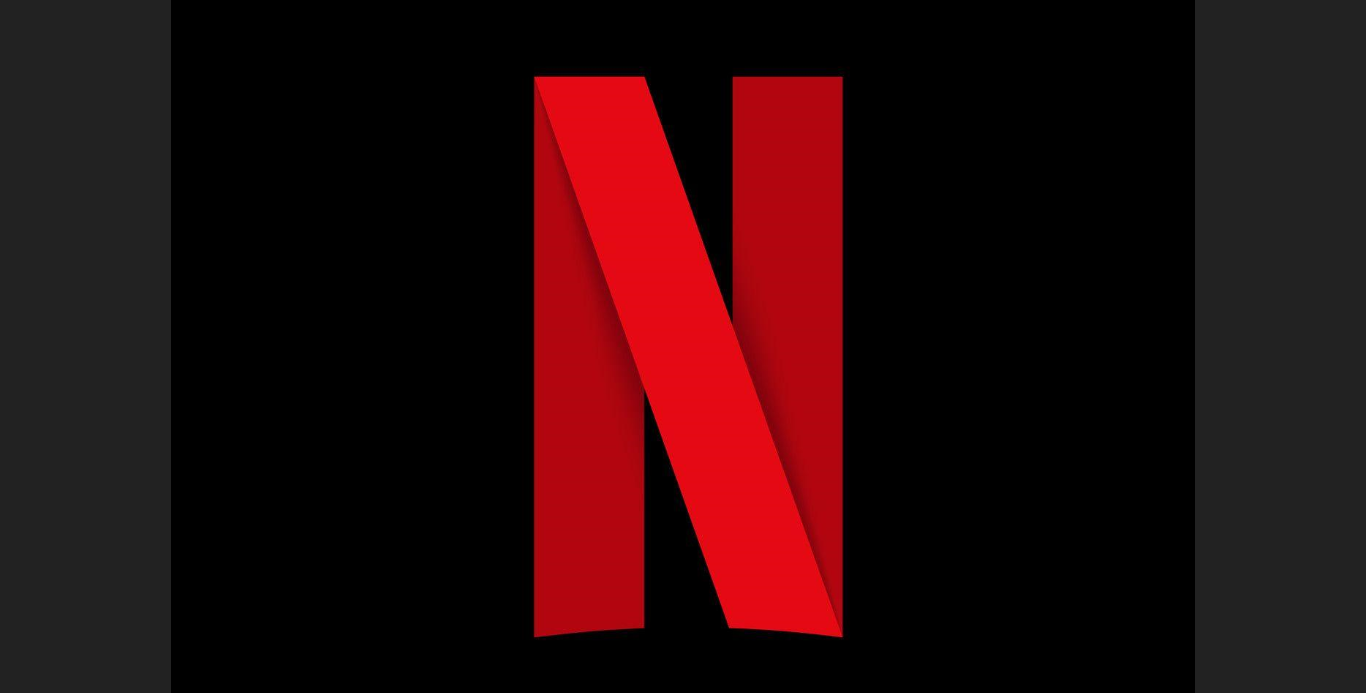

# **GitHub Link -**

https://github.com/DebnarayanMandal/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb

# **Problem Statement**


Netflix is ​​the world's largest online streaming service provider, with more than 220 million subscribers as of the second quarter of 2022. It is important for them to successfully consolidate the programs implemented on their platforms to improve user experience and thus prevent customer churn.
To understand groups of programs that are similar and different from each other, we will be able to create programs that can be used to provide personalized recommendations for people to use things the way they want.
The purpose of this project is to identify/group Netflix shows into specific groups so that they are shown in similar groups and shows in different groups are different from each other.

# **General Guidelines** : -  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.0 MB/s eta 0:00:00


### Dataset First View

In [ ]:
# Dataset First Look
netflix_movies1= pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
netflix_movies1.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
#Dataset Tail
netflix_movies1.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(netflix_movies1.index)
print()
netflix_movies1.shape

RangeIndex(start=0, stop=7787, step=1)



(7787, 12)

In [ ]:
netflix_movies1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Dataset Information

In [ ]:
# Dataset Info
netflix_movies1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
netflix_movies1.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
netflix_movies1.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# Visualizing the missing values
netflix_movies1.isnull().sum().sum()

3631

In [ ]:
#Handling Null Values
netflix_movies1['cast'].fillna(value='No cast',inplace=True)
netflix_movies1['country'].fillna(value=netflix_movies1['country'].mode()[0],inplace=True)
netflix_movies1.shape

(7787, 12)

### What did you know about your dataset?

This collection contains information about various TV series and movies available on Netflix, including details such as country of production, year of release, rating, length, format, and description of each movie. It has 12 lines and 7787 lines.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
netflix_movies1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
netflix_movies1.describe(include='all')

show_id   type title                director     cast        country  \
count     7787   7787  7787                    5398     7787           7787   
unique    7787      2  7787                    4049     6832            681   
top         s1  Movie    3%  Raúl Campos, Jan Suter  No cast  United States   
freq         1   5377     1                      18      718           3062   
mean       NaN    NaN   NaN                     NaN      NaN            NaN   
std        NaN    NaN   NaN                     NaN      NaN            NaN   
min        NaN    NaN   NaN                     NaN      NaN            NaN   
25%        NaN    NaN   NaN                     NaN      NaN            NaN   
50%        NaN    NaN   NaN                     NaN      NaN            NaN   
75%        NaN    NaN   NaN                     NaN      NaN            NaN   
max        NaN    NaN   NaN                     NaN      NaN            NaN   

             date_added  release_year rating  duration      listed_in  \
count              7777   7787.000000   7780      7787           7787   
unique             1565           NaN     14       216            492   
top     January 1, 2020           NaN  TV-MA  1 Season  Documentaries   
freq                118           NaN   2863      1608            334   
mean                NaN   2013.932580    NaN       NaN            NaN   
std                 NaN      8.757395    NaN       NaN            NaN   
min                 NaN   1925.000000    NaN       NaN            NaN   
25%                 NaN   2013.000000    NaN       NaN            NaN   
50%                 NaN   2017.000000    NaN       NaN            NaN   
75%                 NaN   2018.000000    NaN       NaN            NaN   
max                 NaN   2021.000000    NaN       NaN            NaN   

                                              description  
count                                                7787  
unique                                               7769  
top     Multiple women report their husbands as missin...  
freq                                                    3  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

### Variables Description

Attribute Information

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(netflix_movies1.apply(lambda column: column.unique()))

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [nan, Jorge Michel Grau, Gilbert Chan, Shane A...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Create new features to store date, day, month and year seperately.
netflix_movies1["date_added"] = pd.to_datetime(netflix_movies1['date_added'])  # First convert date_added to date time format.
netflix_movies1['day_added'] = netflix_movies1['date_added'].dt.day            # Compute day.
netflix_movies1['year_added'] = netflix_movies1['date_added'].dt.year          # Compute year.
netflix_movies1['month_added'] = netflix_movies1['date_added'].dt.month        # Compute month.

### What all manipulations have you done and insights you found?

We can obtain the following information from the data:

Director: There is a missing value in the 'Director' field.

Country: The country field has no value or how many to write.

Publishing: There is a missing value in the "Publishing" column filled with "No Publishing".

Additional Days: Value is missing in the "Additional Days" column.

Empty entries in the file were identified and numbered up to zero. The unique value in each row must find the unique item in the different row.

Date_added column: Additional information such as day, month and year are extracted from the Date_Added column.

As a result, there are missing values ​​in the data in the Director, Country, Cast and Date rows. Missing values ​​in the Actor column are written with "No Actor", missing values ​​in the country column are counted as zero. Duplicate entries are identified and the results in a column add up to zero. Each column has a different value. Additionally, new columns are reserved for day, month and year.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
labels = ['TV Show', 'Movie']
values = [netflix_movies1.type.value_counts()[1], netflix_movies1.type.value_counts()[0]]

# Colors
colors = ['#228012', '#D12C0B']

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

# Customize layout
fig.update_layout(
    title_text='Type of Content Watched on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of Content', font_size=20, showarrow=False)]
)

# Set colors
fig.update_traces(marker=dict(colors=colors))

##### 1. Why did you pick the specific chart?

A special chart used in the code is a pie chart. I chose this chart because it is a good way to visualize the distribution of categorical data. In this example, the map represents the types of content watched on Netflix, categorized as "TV Shows" and "Movies".

##### 2. What is/are the insight(s) found from the chart?

While TV series constitute 69.1% of the content watched on Netflix, movies have a smaller share at 30.9%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The data shows that people are more interested in television programs than movies, and the rate of watching television is higher than watching movies (69.1%), while the rate of watching movies is lower (30.9%). This shows that people tend to enjoy short content like TV shows rather than wasting time on long videos that may not be interesting.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
import plotly.graph_objects as go
import pandas as pd
tv_show = netflix_movies1[netflix_movies1["type"] == "TV Show"]
movie = netflix_movies1[netflix_movies1["type"] == "Movie"]

col = "year_added"

content_1 = tv_show["year_added"].value_counts().sort_index()
content_2 = movie["year_added"].value_counts().sort_index()

trace1 = go.Scatter(x=content_1.index, y=content_1.values, name="TV Shows", marker=dict(color='#D12C0B', line=dict(width=4)))
trace2 = go.Scatter(x=content_2.index, y=content_2.values, name="Movies", marker=dict(color='#228012', line=dict(width=4)))

fig = go.Figure(data=[trace1, trace2], layout=go.Layout(title="Content added over the years",title_x=0.5, legend=dict(x=0.8, y=1.1, orientation="h")))
# Display chart
fig.show()


##### 1. Why did you pick the specific chart?

Graphs are suitable for showing variations and distributions of data over time (in this case, years). It makes it easy to compare two categories (TV shows and movies) and how their numbers have changed over time.

##### 2. What is/are the insight(s) found from the chart?

Viewing patterns show that some TV series and movies were added to Netflix between 2008 and 2022. However, since 2016, the added content has increased slightly. While there was a clear increase in new movies in 2019, TV series also show the same trend, but the increase is less than movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The information received shows a positive impact on Netflix because the demand for TV series and movies on the platform has increased rapidly over the years. This development gives Netflix the opportunity to offer better content to its users, keeping users satisfied and engaged.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
# Create a DataFrame to store month values and counts
months_df = pd.DataFrame(netflix_movies1['month_added'].value_counts())

# Reset the index to create a "month" column
months_df.reset_index(inplace=True)

# Rename the columns to "month" and "count"
months_df.rename(columns={'index': 'month', 'month_added': 'count'}, inplace=True)
fig = px.bar(months_df, x="month", y="count", text_auto=True, color='count', color_continuous_scale=['#D12C0B', '#228012'])
fig.update_layout(
    title={
        'text': 'Month wise Addition of Movies and TV Shows on Netflix',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1000,
        height=500,
        showlegend=True)
# fig.show()
fig.show()

##### 1. Why did you pick the specific chart?

Bar charts are designed to compare and display categorical data (months) and their totals. This chart helps understand the distribution of additional content over several months and identify patterns or trends.

##### 2. What is/are the insight(s) found from the chart?

There is an increase in the number of TV series and movies broadcast on the Netflix platform between October and December. The month of October to December is known for many festivals and celebrations such as Halloween, Diwali, Thanksgiving and Christmas; This often results in people spending a lot of time at home and looking for entertainment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The information obtained from the increase in TV series and movies on the Netflix platform in October and December can be very useful for the business world. Here are a few reasons why:-

1- Meeting seasonal demand

2- Retaining existing customers

3- Dealing with new buyers

#### Chart - 4

<Axes: xlabel='month_added', ylabel='count'>

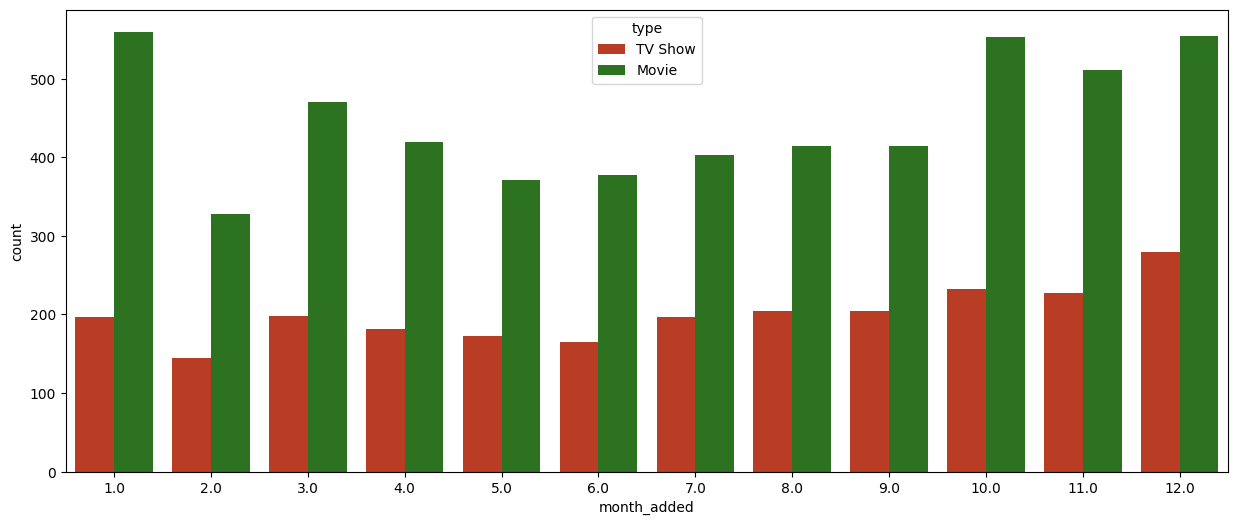

In [ ]:
# Chart - 4 visualization code
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='month_added', hue='type',lw=5, data=netflix_movies1, ax=ax,palette=['#D12C0B' ,'#228012'])

##### 1. Why did you pick the specific chart?

By using a countplot, we can easily see and compare the frequencies of TV show and movie additions for each month.

##### 2. What is/are the insight(s) found from the chart?

Movies:

January, October and December seem to be the months that add more movies to Netflix compared to other months.

TV Programs:

October, November and December Compared to other months, December is the month when new series on Netflix are most preferred.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights regarding the trending months for movies and TV shows on Netflix can potentially create a positive business impact. Here's why:

1-Meeting Viewer Demand:

2-Capitalizing on Seasonal Trends:

3-Improved Competitiveness:

#### Chart - 5

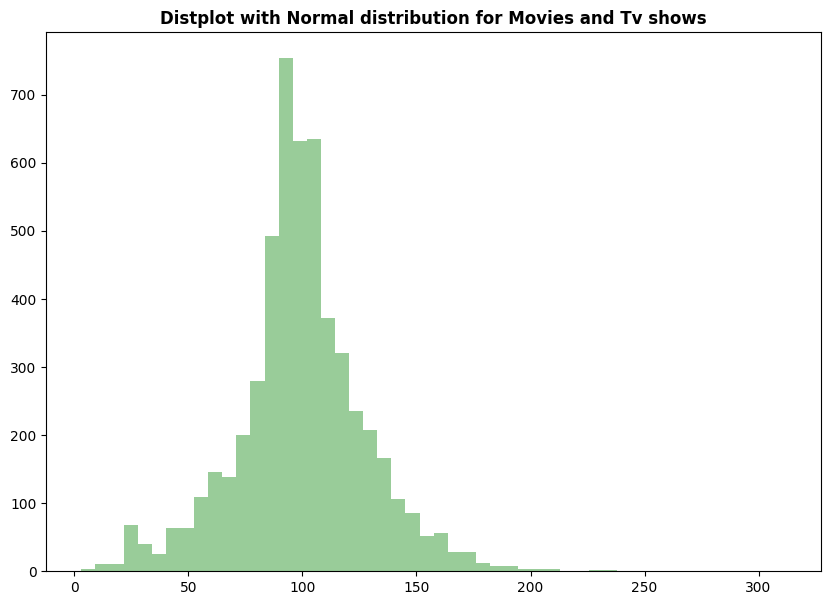

In [ ]:
# Chart - 5 visualization code
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(movie['duration'].str.extract('(\d+)'),kde=False, color=['green'])
plt.title('Distplot with Normal distribution for Movies and Tv shows',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

Distplot is the appropriate choice for this analysis because it allows us to analyze the frequency or number of videos falling at different times.

##### 2. What is/are the insight(s) found from the chart?

The average length of movies and TV shows varies between 50 and 150 minutes, depending on the specific content available on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1- Easy audience audience: Netflix can follow the different interests and programs of its viewers by offering films and series of various lengths, from short films to full-length epics

2-Increasing integration: series of various lengths, giving viewers the option to choose content that suits their leisure time . This can lead to engagement and increased viewing time.

3 Content diversity: By including movies and TV shows from different genres, Netflix can expand its content library and adapt to different genres and storytelling.

#### Chart - 6

<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

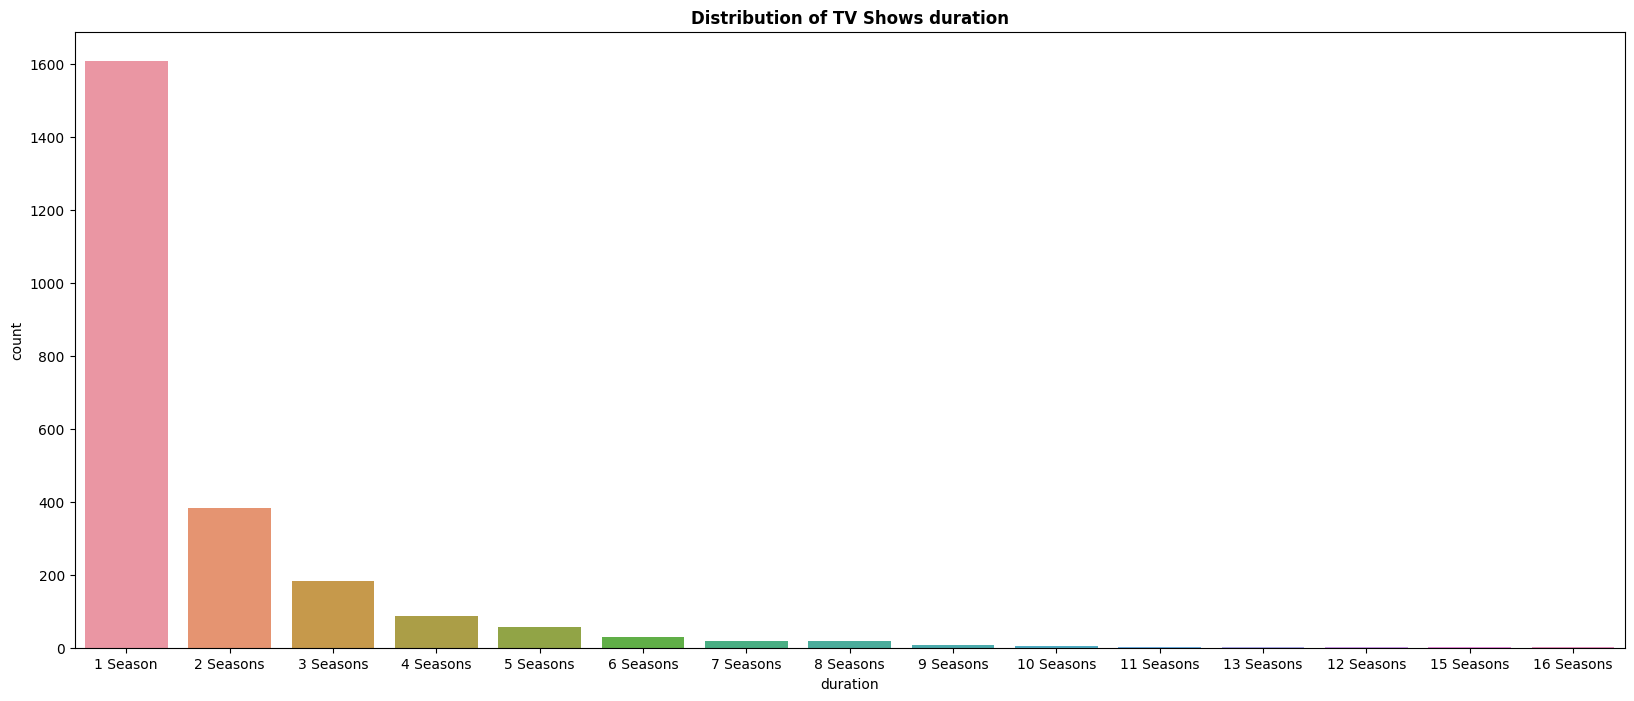

In [ ]:
# Chart - 6 visualization code
#Checking the distribution of TV SHOWS
plt.figure(figsize=(20,8))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_show['duration'],data=tv_show,order = tv_show['duration'].value_counts().index)

##### 1. Why did you pick the specific chart?

The chart in question is a count chart, which is a bar chart that shows the frequency or count of each category in a categorical variable. It seems to be used to show season distributions of TV series.

##### 2. What is/are the insight(s) found from the chart?

From the map, we see that most series or websites in the database consist of only one season, while the remaining series consist of more than two, three, four or five seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the effect is good because creators and streaming platforms can improve production times by recognizing that most TV shows have a specific season. They can allocate resources more efficiently, reduce production costs and potentially increase content output.

#### Chart - 7

([<matplotlib.patches.Wedge at 0x7fb4d7f2e860>,
 [Text(-0.8902585632950727, -0.6460957285726268, 'Others'),
  Text(0.9711911599582614, 0.7048317038974106, 'Originals')],
 [Text(-0.4855955799791305, -0.3524158519487055, '69.98%'),
  Text(0.5665281766423191, 0.4111518272734894, '30.02%')])

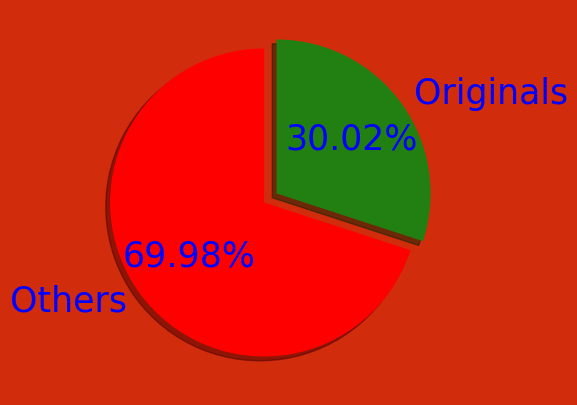

In [ ]:
# Chart - 7 visualization code
movie['originals'] = np.where(movie['release_year'] == movie['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#D12C0B")
ax.patch.set_facecolor("#F0F3F4")
explode = (0, 0.1)
ax.pie(movie['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"blue", 'fontsize': 25}, colors =['red','#228012'])

##### 1. Why did you pick the specific chart?

A pie chart is a suitable choice for visualizing the distribution of categorical data, in this case the ratio of "original data" to "other data." It allows you to see the relative size of each group as part of the whole.

##### 2. What is/are the insight(s) found from the chart?

30% of the movies on Netflix are Netflix originals, and 70% are movies that were previously released by various distributors and later added to Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, gaining insight will help you build a successful business. By understanding movie distribution on Netflix, such as the ratio of Netflix history to non-history, the streaming service can make informed decisions about content acquisition and production.

#### Chart - 8

In [ ]:
netflix_movies1['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                              No cast
Name: cast, Length: 7787, dtype: object

In [ ]:
# seperating actors from cast column
cast = netflix_movies1['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()


No cast             718
Anupam Kher          42
Shah Rukh Khan       35
Om Puri              30
Naseeruddin Shah     30
                   ... 
Archie Alemania       1
Demore Barnes         1
Marty Adams           1
Nicole Boivin         1
Rachel Khoo           1
Length: 32882, dtype: int64

In [ ]:
cast =cast[cast != 'No cast']
cast.value_counts()

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Length: 32881, dtype: int64

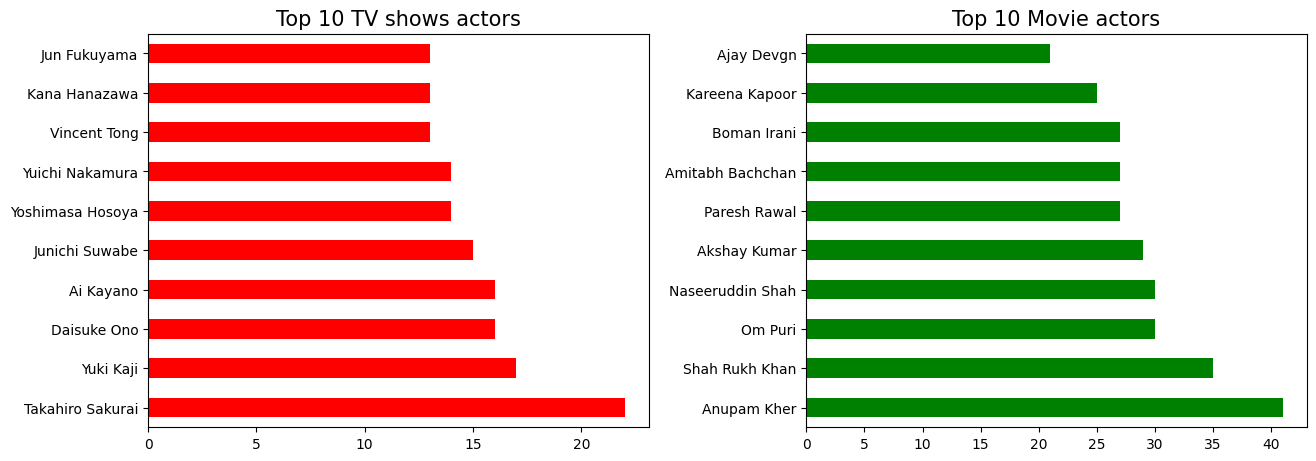

In [ ]:
# Chart - 8 visualization code
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = netflix_movies1[netflix_movies1['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
top_TVshows_actor =top_TVshows_actor[top_TVshows_actor != 'No cast']
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0],color='red')
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = netflix_movies1[netflix_movies1['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
top_movie_actor =top_movie_actor[top_movie_actor != 'No cast']
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1],color='Green')
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

The horizontal orientation of the bars makes it easier to read and compare prices. The length of each bar represents the number of TV shows or movies the actor has appeared in. The map also includes a heading and is divided into two subsections; which makes it clear that one of the subsections represents a TV show and the other a movie.

##### 2. What is/are the insight(s) found from the chart?

In the TV shows category, the actor with the highest appearance is Takahiro Sakurai. In the movies category, the actor with the highest appearance is Anupam Kher.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
top_10_Genre = netflix_movies1['listed_in'].value_counts().head(10)

fig2 = px.pie(top_10_Genre, values=top_10_Genre.values, names=top_10_Genre.index)

custom_colors = ['#228012', '#52BE80 ', '#D4EFDF', '#CD6155', '#A93226']
fig2.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0,
                   marker=dict(colors=custom_colors))

fig2.update_layout(height=600, width=900, title='Top 10 genres on Netflix',
                   margin=dict(t=100, b=30, l=0, r=0),
                   showlegend=False,
                   plot_bgcolor='#fafafa',
                   paper_bgcolor='#fafafa',
                   title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                   font=dict(size=12, color='#FF0000'),
                   hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

fig2.show()

##### 1. Why did you pick the specific chart?

The circle of the pie chart allows viewers to compare different sizes by looking at the relative area of ​​the slices. Letters and percentages of extrapolations provide additional information and improve the reading of the article.

##### 2. What is/are the insight(s) found from the chart?

In this report, the top three genres on Netflix by distribution are as follows:

1-Documentary: 14.4%

2-Stand-up comedy: 13.9%

3 -Drama, International movies: 1 3.8%

This movie has the highest percentage in the Top 10 list compared to other genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The information obtained by analyzing the distribution of movies on Netflix can help create a good business in many ways

1- Content improvement: Netflix can promote by focusing on the movies that viewers want. To show a wide and interesting selection of movies to their customers and show it to their customers

2-Received and produced names: There are high and mature listeners who can guide them in determining the desired movies. This optimizes their resources in content creation and acquisition.

3- Personalized recommendations: Provide users with personalized recommendations, improve their experience and encourage them to spend more time on the platform.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
# number of unique values
netflix_movies1['release_year'].nunique()

73

In [ ]:
print(f'Oldest release year : {netflix_movies1.release_year.min()}')
print(f'Latest release year : {netflix_movies1.release_year.max()}')

Oldest release year : 1925
Latest release year : 2021


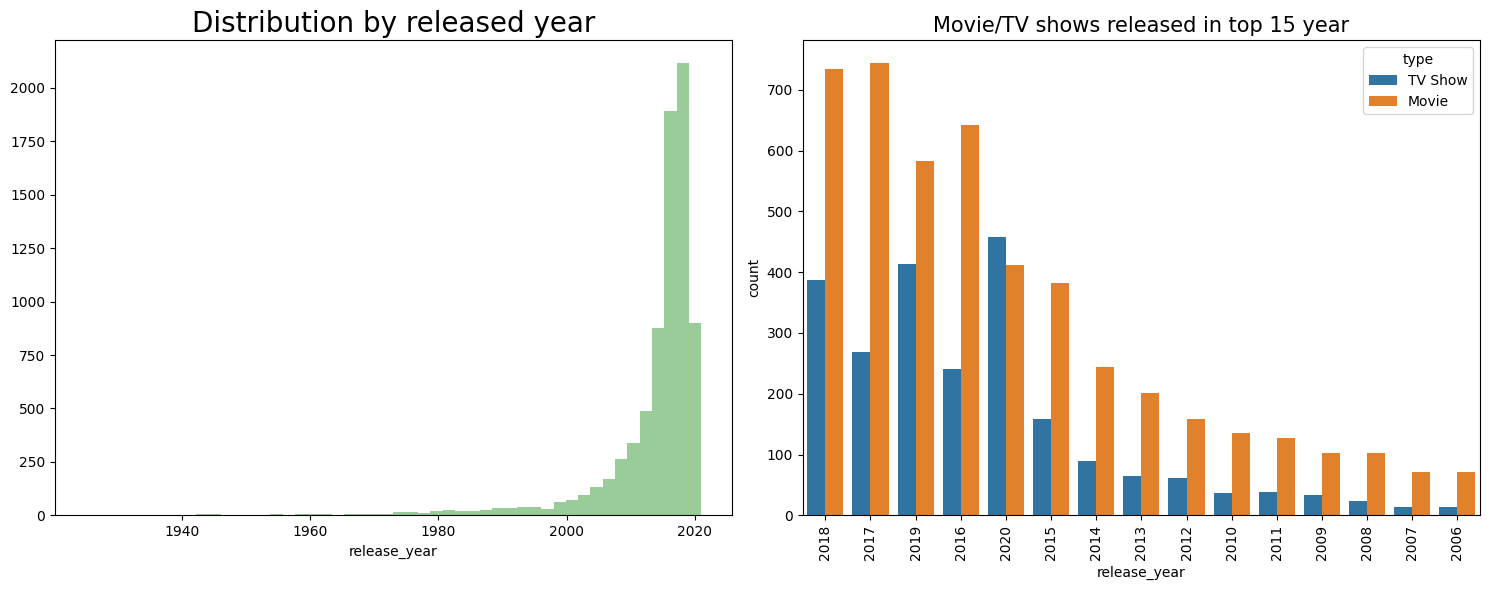

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.distplot(netflix_movies1['release_year'], ax=ax[0], kde=False,color='green')
hist.set_title('Distribution by released year', size=20)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=netflix_movies1, order=netflix_movies1['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Choose a combination of histograms and cluster plots for both analytical and bivariate analysis. The histogram gives an overview of the distribution of movies by year of release, while the bar chart compares movies and TV shows released in the last 15 years.

##### 2. What is/are the insight(s) found from the chart?

The year of release shown in the bar chart shows the general trend for movies released on Netflix from the 1980s onwards. The number of releases gradually increased, showing significant growth starting from 2000. Movies/TV shows released during this period.

In terms of content (movies, TV shows), the most popular in the bar chart are 2017 and 2020. In recent years, many movies, TV series, and combinations of the two have been released on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained contribute to good work. By understanding annual distribution and analyzing trends, businesses can make informed decisions about content acquisition, production and marketing strategies.

#### Chart - 11

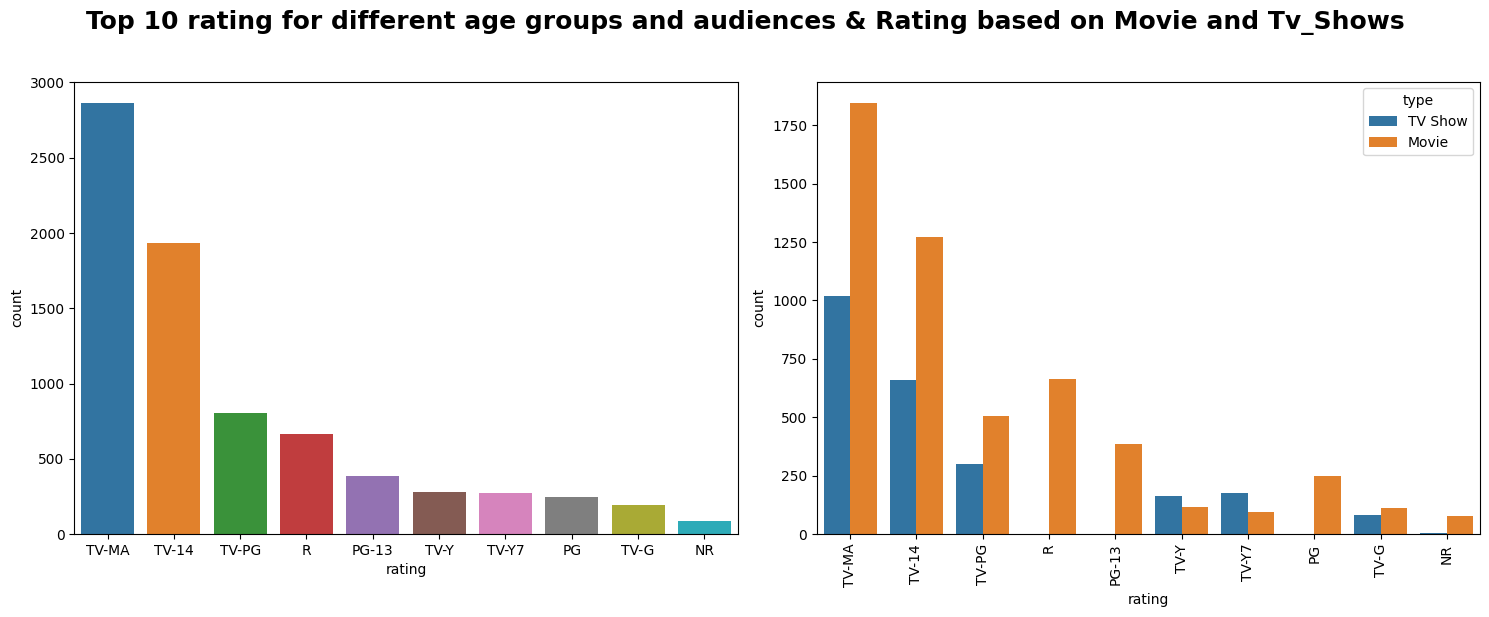

In [ ]:
# Chart - 11 visualization code
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating for different age groups and audiences & Rating based on Movie and Tv_Shows',
             weight='bold', y=1.02, size=18)

# univariate analysis
sns.countplot(x="rating", data=netflix_movies1, order=netflix_movies1['rating'].value_counts().index[0:10], ax=ax[0])



# bivariate analysis
graph = sns.countplot(x="rating", data=netflix_movies1, hue='type', order=netflix_movies1['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A combined plot of two count tables allows for both univariate and bivariate analyses. The first chart shows information on the top 10 ratings for all titles, while the second chart provides a comparison of ratings specifically for movies and TV.

##### 2. What is/are the insight(s) found from the chart?

TV-MA: This rating means the content is intended for mature audiences only. May contain violence, sexual content or strong language

When it comes to ratings, the highest rating is TV-MA, which is used for both movies and TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

TV-MA is the most popular rating system for movies and TV shows, and this insight can inform content strategy, audience and marketing decisions, work and different content, which will have a positive impact in terms of further business expansion and customer satisfaction.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
netflix_movies1['director']=netflix_movies1['director'].fillna('')
# Create a DataFrame with director counts
directors_list = netflix_movies1.director.value_counts().reset_index().head(15)[1:]
directors_list.rename(columns={'index':'Directors name', 'director':'Count'}, inplace=True)

# Create a bar chart using Plotly
fig = px.bar(directors_list, x='Directors name', y='Count', text_auto=True)

# Generate a list of 25 unique color codes using seaborn
color_palette = sns.color_palette('bright', n_colors=15).as_hex()
fig.update_traces(marker_color=color_palette)

# Add a title and adjust the layout
fig.update_layout(
    title={
        'text': 'Top 25 directors with highest number of Movies and Tv Shows.',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    autosize=False,
    width=1200,
    height=500
)

# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

Well-chosen graphics present information in a clear, visually pleasing way, allowing viewers to easily identify Netflix's top contributors.

##### 2. What is/are the insight(s) found from the chart?

Of all the movies and series on Netflix, directors Raúl Campos and Jan Suter have the highest number.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_movies1['target_ages'] = netflix_movies1['rating'].replace(ratings)

# Preparing data for heatmap
netflix_movies1['count'] = 1
data = netflix_movies1.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = netflix_movies1.loc[netflix_movies1['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap


country        Canada     Egypt    France     India     Japan  Mexico  \
target_ages                                                             
Adults       0.446328  0.277228  0.678261  0.255688  0.364444    0.77   
Kids         0.180791  0.000000  0.095652  0.016251  0.008889    0.02   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.271111    0.07   
Teens        0.146893  0.683168  0.165217  0.567714  0.355556    0.14   

country      South Korea     Spain  United Kingdom  United States  
target_ages                                                        
Adults          0.469945  0.835821        0.513854       0.471550  
Kids            0.027322  0.022388        0.093199       0.089601  
Older Kids      0.120219  0.044776        0.204030       0.195553  
Teens           0.382514  0.097015        0.188917       0.243296

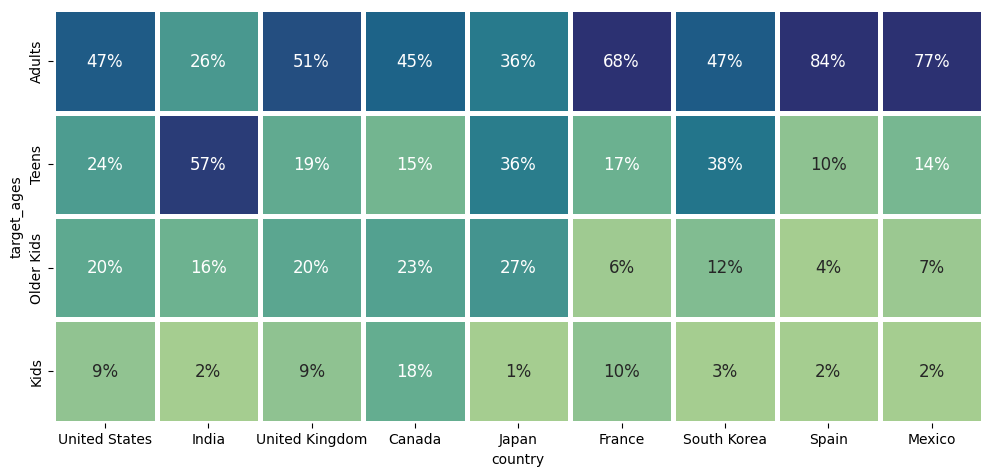

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap.loc[age_order, country_order2],
            cmap='crest',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()



##### 1. Why did you pick the specific chart?

To see the relationship between two variables (in this case country and age group), heat maps are the appropriate choice. It can clearly show patterns, trends and comparisons of each group.

##### 2. What is/are the insight(s) found from the chart?

In summary, the data presented shows that the level of interest in this topic varies by country and target age. Here are all the results:

Among the countries listed, Spain stands out with the majority of adults being satisfied with 84%. This shows that Spanish adults are interested in the subject.

1. France - 68% of adults care about this and have a high level of involvement.

2. India - Young people show the most interest; 57% are interested. This shows the real interest of Indian youth.

3. United Kingdom - Satisfaction is high among adults; 51% express their satisfaction.

4. Mexico - There is also great interest here; 77% of adults are interested in this topic.

5. South Korea, USA - 47% of adults in both countries expressed interest, indicating a moderate level of participation

6. Japan – Adults and youth saw moderate participation. satisfaction, 36% of all groups expressed satisfaction.

7. Canada - Interest rates have the lowest among the countries listed; 45% of adults are satisfied.

Overall, these results show that there are differences in interest rates across countries and target ages. Data shows that satisfaction among seniors is higher in Spain, France, India and Mexico, while Canada has lower satisfaction than other countries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Depending on the context and specific business goals, the insights gained can help create effective business strategies.

1-Product development

2-Business expansion

3- Cooperation and collaboration

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

t-distribution

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis and other hypotheses are used for statistical analysis. While null hypothesis testing always predicts no effect or relationship between variables, alternative hypothesis refers to your research's prediction of an effect or relationship.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#making copy of df_clean_frame
netflix_hypothesis=netflix_movies1.copy()
#head of df_hypothesis
netflix_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0      2017.0   
4  A brilliant group of students become card-coun...        1.0      2020.0   

   month_added target_ages  count  
0          8.0      Adults      1  
1         12.0      Adults      1  
2         12.0      Adults      1  
3         11.0       Teens      1  
4          1.0       Teens      1

In [ ]:
#filtering movie from Type_of_show column
netflix_hypothesis = netflix_hypothesis[netflix_hypothesis["type"] == "Movie"]
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_hypothesis['target_ages'] = netflix_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
netflix_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', nan], dtype=object)

In [ ]:
netflix_hypothesis['target_ages'] = pd.Categorical(netflix_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

netflix_hypothesis['duration'] = netflix_hypothesis['duration'].astype(str)  # Convert to string type
netflix_hypothesis['duration'] = netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

netflix_hypothesis.head(3)

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   

  date_added  release_year rating  duration  \
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   

                                         description  day_added  year_added  \
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0      2017.0   

   month_added target_ages  count  
1         12.0      Adults      1  
2         12.0      Adults      1  
3         11.0       Teens      1

In [ ]:
#group_by duration and target_ages
group_by_= netflix_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

target_ages    duration
0        Kids   66.486891
1  Older Kids   92.024648
2       Teens  110.025332
3      Adults   98.275145

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(group, *['duration'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(group, *['duration'], **{})
chart

In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

##### Which statistical test have you done to obtain P-Value?

t-value is not in the range, the null hypothesis is rejected.

As a result, movies rated for kids and older kids are not at least two hours long.

##### Why did you choose the specific statistical test?

HO:Movies rated for kids and older kids are at least two hours long.(Null Hypothesis)

H1:Movies rated for kids and older kids are not at least two hours long.(Alternate Hypothesis)

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

HO:Movies rated for kids and older kids are at least two hours long.(Null Hypothesis)

H1:Movies rated for kids and older kids are not at least two hours long.(Alternate Hypothesis)

#### 2. Perform an appropriate statistical test.

In [ ]:
#making copy of df_clean_frame
netflix_hypothesis=netflix_movies1.copy()
#head of df_hypothesis
netflix_hypothesis.head()
# Perform Statistical Test to obtain P-Value
netflix_hypothesis['duration']= netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie','TV Show'])

netflix_hypothesis.head(3)

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   

                                                cast    country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico 2016-12-23   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore 2018-12-20   

   release_year rating  duration  \
0          2020  TV-MA         4   
1          2016  TV-MA        93   
2          2011      R        78   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   

   month_added target_ages  count  
0          8.0      Adults      1  
1         12.0      Adults      1  
2         12.0      Adults      1

In [ ]:
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie','TV Show'])

In [ ]:
group_by_= netflix_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group1=group_by_.mean().reset_index()
group1

type   duration
0    Movie  99.307978
1  TV Show   1.775934

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(group1, *['duration'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(group1, *['duration'], **{})
chart

In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.307978
dtype: float64
Std  duration    1.596359
dtype: float64


##### Which statistical test have you done to obtain P-Value?

P values ​​are used in hypothesis testing to help determine whether the null hypothesis should be rejected. It plays an important role when discussing scientific results. Hypothesis testing is a frequently used method in clinical and clinical research.

##### Why did you choose the specific statistical test?

There try to find out the mean duration and std duration with data type.

### Hypothetical Statement - 3

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5377 2410
dof 7785
SP_2 = duration    253.64841
dtype: float64
SP duration    15.926343
dtype: float64
tvalue 249.81856492927665


In [ ]:
stats.t.ppf(0.025,dof)

-1.9602687544602204

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.96026875446022

##### Which statistical test have you done to obtain P-Value?

P values ​​are used in hypothesis testing to help determine whether the null hypothesis should be rejected. It plays an important role when discussing scientific results. Hypothesis testing is a frequently used method in clinical and clinical research.

##### Why did you choose the specific statistical test?

Here I find out the t value and data type. And this static give the best predicted value.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
print(netflix_movies1.isnull().sum())

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
day_added       10
year_added      10
month_added     10
target_ages      7
count            0
dtype: int64


In [ ]:
df_copy = netflix_movies1.dropna()
df_copy

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                        João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                                               Nasty C   
7785                                            Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            No cast   

                                                country date_added  \
0                                                Brazil 2020-08-14   
1                                                Mexico 2016-12-23   
2                                             Singapore 2018-12-20   
3                                         United States 2017-11-16   
4                                         United States 2020-01-01   
...                                                 ...        ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar... 2020-10-19   
7783                                              India 2019-03-02   
7784                                      United States 2020-09-25   
7785                                          Australia 2020-10-31   
7786              United Kingdom, Canada, United States 2020-03-01   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  day_added  \
0     In a future where the elite inhabit an island ...       14.0   
1     After a devastating earthquake hits Mexico Cit...       23.0   
2     When an army recruit is foun

First, I replace the words NaN vlaue unknown actor and unknown country with actor and country. I then remove lines whose value is less than or equal to 10 NaN.

### 2. Handling Outliers

Before outlier treatment


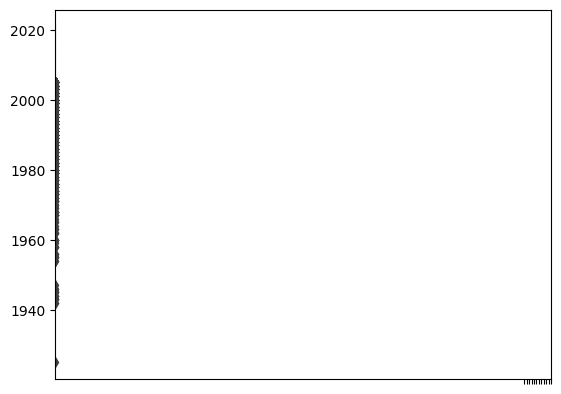

After iteration 1


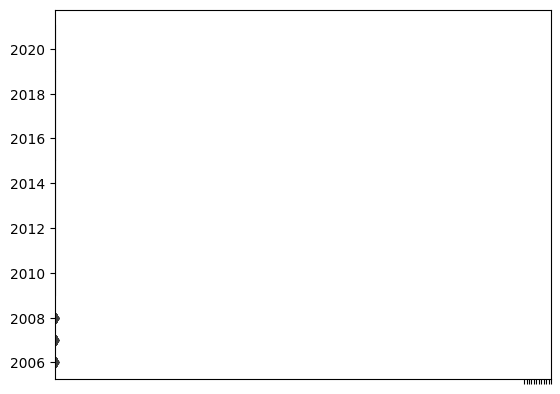

After iteration 2


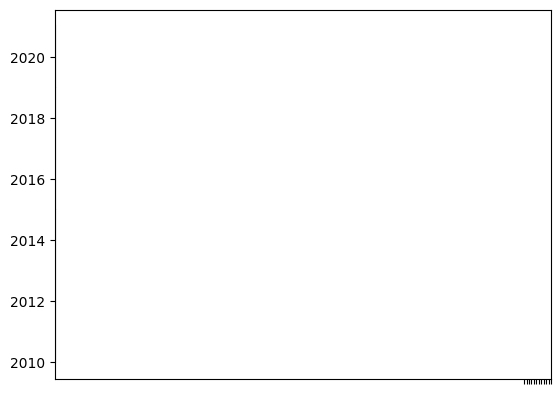

In [ ]:
# Handling Outliers & Outlier treatments
# Function for displaying outliers
def displayOutliers():
  #*** This function display outliers ***
  sns.boxplot(df_copy['release_year'])
  plt.xticks(np.arange(1920, 2031,10))
  plt.show()


# Function for outlier treatment
def treatOutliers (df_copy):
#*** Function takes dataset and returns a dataset after treating the outliers
  q1 = df_copy['release_year'].quantile(.25)
  q3= df_copy['release_year'].quantile(.75)
  iqr =q3-q1
  lower= q1-1.5*(iqr)
  df_copy = df_copy [df_copy['release_year'] > lower]
  return df_copy
# Treating the outlier by applying the above function
print('Before outlier treatment')
displayOutliers()
for i in range(2):
    print('After iteration '+str(i+1))
    df_copy =treatOutliers(df_copy)
    displayOutliers()


##### What all outlier treatment techniques have you used and why did you use those techniques?

Here understand the outlier value and remove them then for better tain dataset.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
df_copy['movie'] = df_copy['type'].apply(lambda x: 1 if x=='Movie' else 0)
df_copy['tv_show'] = df_copy['type'].apply(lambda x: 0 if x== 'Movie' else 1)
df_copy.drop(columns=['type'], inplace=True)

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
# Combining the textual columns and assigning it to a new variable
df_copy['cluster_col'] = (df_copy['cast']+' '+df_copy['listed_in']+' '+' '+df_copy['description'])

#### 2. Lower Casing

In [ ]:
# Lower Casing
#Function to convert in lower case
def lower_casing(text):
#function takes string and conver it to lower case
  list_of_words= [letter.lower() for letter in text.split()]
  return' '.join(list_of_words)
  df_copy['cluster_col'] = df_copy ["cluster_col"].apply(lower_casing)


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def rem_punctuation(text):
#takes text and removes punctuations
  return ''.join([t for t in text if t not in string.punctuation])
#Remove Punctuations
df_copy['cluster_col'] = df_copy['cluster_col'].apply(lower_casing)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
def removeDigits (text):
#takes text and removes digits
    nums= ['0','1','2','3','4','5','6','7','8','9']
    return''.join([t for t in text if t not in nums])
df_copy['cluster_col']= df_copy['cluster_col'].apply(removeDigits)
#Function to remove url.
def removeuris(text):
#Takes a texts and removes url
    return' '.join([t for t in text.split(",") if t not in ['com', "www","http://"]])
#Resolve URLs & Remove words and digits contain digits
df_copy['cluster_col'] =df_copy['cluster_col'].apply(removeuris)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk
nltk.download("stopwords")
#Function to remove stop words
def removeStopWords(text):
#Takes text and removes stop words
    stopwords_ = nltk.corpus.stopwords.words("english")
    return''.join([t for t in text.split() if t not in stopwords_])
#Remove Stopwords
print("Length before removing stopwords", len(df_copy["cluster_col"][0]))
df_copy['cluster_col']= df_copy['cluster_col'].apply(removeStopWords)
print("Length after removing stopwords", len(df_copy ["cluster_col"][0]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Length before removing stopwords 361
Length after removing stopwords 260


In [ ]:
# Remove White spaces

def removewhiteSpace(text):
#takes text and removes white spaces
  return' '.join([t for t in text.split(" ")])
#Remove white spaces
df_copy['cluster_col'] = df_copy['cluster_col'].apply(removewhiteSpace)

#### 7. Tokenization

In [ ]:
# Tokenization

from sklearn.feature_extraction.text import CountVectorizer
def getVectorized(df):
#Function takes dataset and apply vectorization
  count_vectorizer = CountVectorizer()
  #Fitting the count vectorizer
  count_vectorizer.fit_transform(df["cluster_col"])
  #Collecting the vocabularies
  return count_vectorizer.vocabulary_.items()
# Applying the above function and showing the features dictionary_cluster_col- getVectorized(df_copy)
dictionary_cluster_col = getVectorized(df_copy)
dictionary_cluster_col

dict_items([('joãomiguelbiancacomparatomichelgomesrodolfovalentevanezaoliveirarafaellozanovivianeportomelfronckowiaksergiomambertizezémottacelsofrateschiinternationaltvshowstvdramastvsci', 7692), ('fi', 5336), ('fantasyfutureeliteinhabitislandparadisefarcrowdedslumsgetonechancejoin', 5096), ('savedsqualor', 12565), ('demiánbichirhéctorbonillaoscarserranoazaliaortizoctaviomichelcarmenbeatodramasinternationalmoviesdevastatingearthquakehitsmexicocitytrappedsurvivorswalkslifewaitrescuedtryingdesperatelystayalive', 3809), ('teddchanstellachunghenleyhiilawrencekohtommykuanjoshlaimarkleesusanleongbenjaminlimhorrormoviesinternationalmoviesarmyrecruitfounddeadfellowsoldiersforcedconfrontterrifyingsecretthat', 15596), ('shauntingjungleislandtrainingcamp', 13599), ('erdalbeşikçioğluyaseminallenmelisbirkansaygınsoysalberkanşalmetinbelginayçaerenselinuludoğanözayfechtsunayıldızoğluinternationaltvshowstvdramastvmysteriesgeneticsprofessorexperimentstreatmentcomatosesisterblendsmedicalshamaniccuresunl

In [ ]:
print("Total Features", len(dictionary_cluster_col))

Total Features 17855


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#Stemming finction
def stemming(text):
# Normalizing Text (1.e., Stemming, Lemmatization etc.) return.join([stemmer.stem(t) for t in text.split()])
#Takes text and returns after stemming.
  stemmer= SnowballStemmer("english")
  return''.join([stemmer.stem(t) for t in text.split()])
def assignWordsAndCountsToList(dictionary):
#Function to assign words and counts from dictionary to list Takes dictionary and return list of words and counts. for key, value in dictionary:
  vocab_cluster =[]
  vocab_counts_cluster = []
  for key, value in dictionary:
    vocab_cluster.append( key)
    vocab_counts_cluster.append(value)
  return vocab_cluster, vocab_counts_cluster
#Function to display word count
def displayTop20words(df):
#Displays top 20 words.
  plt.barh(df.head(20)['word'].values, df.head (20) ["count"].values)
  plt.xlabel("Count")
  plt.ylabel("Words")
  plt.show()

##### Which text normalization technique have you used and why?

The two most important forms of text normalization are stemming and lemmatization. Lemmatization is radically different in that it shows the basic form of a word while developing semantics.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
# Assigning words and counts to lists
vocab_cluster, vocab_counts_cluster =assignWordsAndCountsToList(dictionary_cluster_col)
#Words and counts before stemming
df_cluster_before_stem = pd.DataFrame({'word':vocab_cluster, 'count':vocab_counts_cluster}).sort_values(by="count", ascending=False)
df_cluster_before_stem.head(20).T

6352                                               17530  \
word    ṣọpẹ  şükrüözyıldızaslıenverşenaygürlerbaşakparlakma...   
count  17854                                              17853   

                                                   8643   \
word   şçiltubaünsalinternationaltvshowstvdramasteent...   
count                                              17852   

                                                   8333   \
word   ştargökseveninternationaltvshowsromantictvshow...   
count                                              17851   

                                                   7656   \
word   ştargöksevenerdaltosuntarıkünlüoğlucomediesint...   
count                                              17850   

                                                   8549   \
word   ştargöksevencomediesinternationalmovieschattyn...   
count                                              17849   

                                                   5372   \
word   şlermehmetgünsürçiğdemselışıkonattubabüyüküstü...   
count                                              17848   

                                                   13573  \
word   şitenaslıturanlıahmetolgunsünearsedatürkmenayt...   
count                                              17847   

                                                   6869         10390  \
word   şcaninternationaltvshowstvdramastvhorrordriven...  şahinirmaki   
count                                              17846        17845   

                                                   15935  \
word   úrsulacorberóálvarocervantesnajwanimripatricia...   
count                                              17844   

                                                   8005   \
word   úrsulacorberóitziarituñoálvaromortepacotousenr...   
count                                              17843   

                                                   4756   \
word   öykükarayelfatihartmanfundaeryiğitdefnekayalar...   
count                                              17842   

                                                   617    \
word   édouardbodziakmathildewarnierjoséphinedelabaum...   
count                                              17841   

                                                   10978  \
word   çağlarçorumlubüşrapekinersinkorkutgülhantekinm...   
count                                              17840   

                                                   15622  \
word   çağatayulusoyayçaayşinturanhazarergüçlüokanyal...   
count                                              17839   

                                                   14042  \
word   álvaroogallamartalarraldebárbaralennievickypeñ...   
count                                              17838   

                                                   15459  \
word   àlexmonneremmasuárezsergilópezbrunotodeschinii...   
count                                              17837   

                                        10096  \
word   ztinafeyhowardsterndavidlettermanstand   
count                                   17836   

                                                   13890  
word   zoyahussainsuhasinimulayjimsarbhaaryadaveanjum...  
count                                              17835

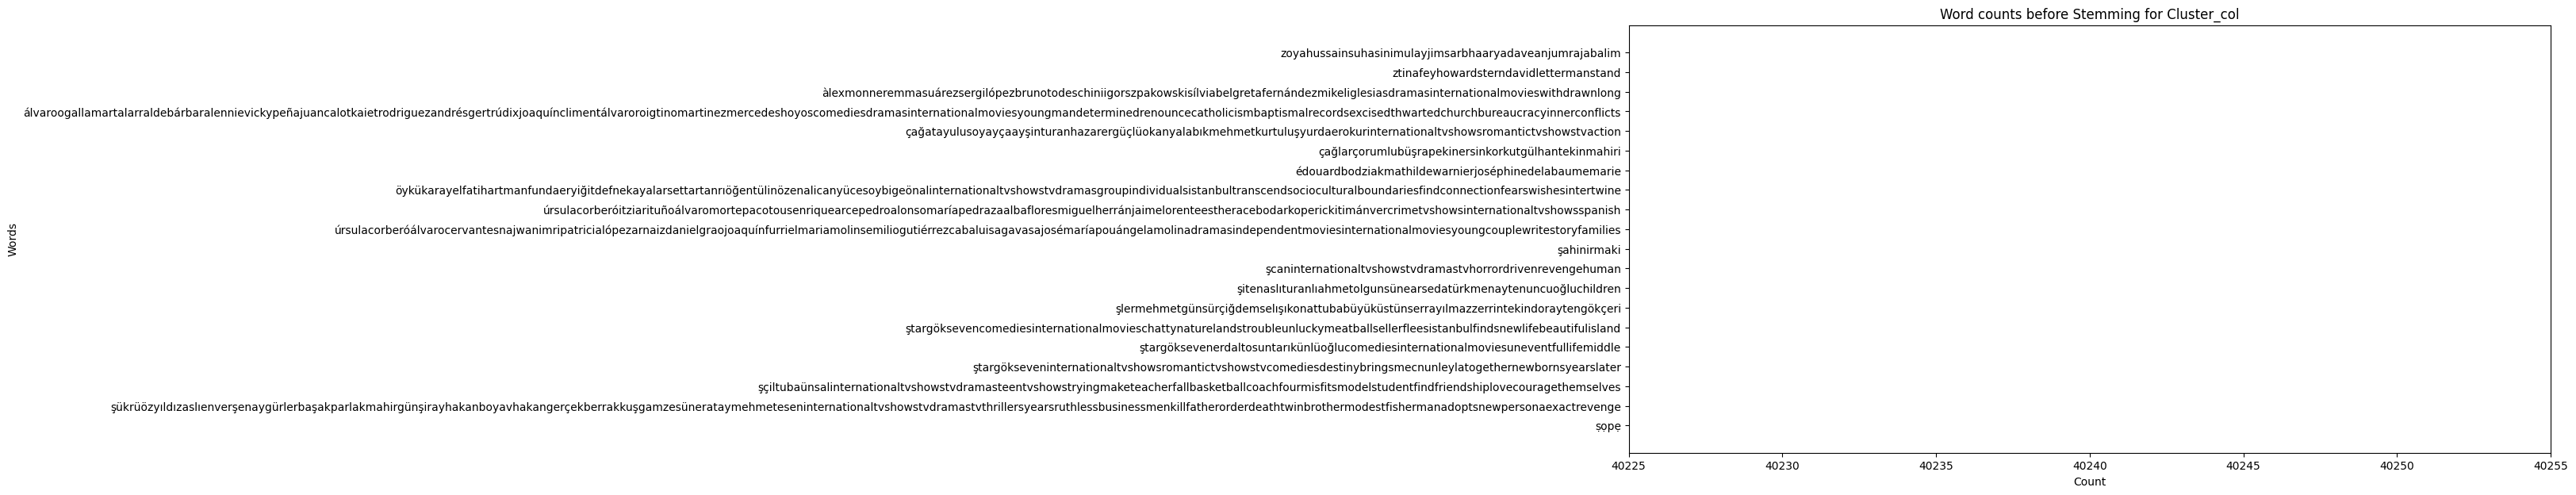

In [ ]:
#Plotting top 10 words.
plt.rcParams["figure.figsize"] = (15,7)
plt.xlim(40225,40255)
plt.title('Word counts before Stemming for Cluster_col')
displayTop20words(df_cluster_before_stem)

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
#Function to get number from proportion
def proportionToNumber (proportion, data):
  return (proportion*data)/100
num = int(round(proportionToNumber (1, len(df_copy)),0))
#Vectorizing Text discarding features which are available less then 1% of the dataset and more than 90%.
tfidfvectorizer =TfidfVectorizer (min_df=num,max_df=.9)
features_array = tfidfvectorizer.fit_transform(df_copy['cluster_col']).toarray()
features_names =tfidfvectorizer.get_feature_names_out()
df_copy.shape

(6596, 19)

In [ ]:
X = pd.DataFrame(features_array,columns=features_names)
X.shape

(6596, 2)

##### Which text vectorization technique have you used and why?

TF-IDF provides two metrics: time frequency (TF) and inverse document frequency (IDF).

Term Frequency (TF): This metric measures the frequency of a word in a document. The more a time appears in a document, the more time it considers to be relevant to the document. Calculate using the following formula:

TF(t, d) = (number of times t appears in form d)/(all points in form d)

Inverse Document Frequency (IDF): This measure measures the importance of a word in a document. More weight is given to elements that are less visible in the entire set. The calculation formula is as follows:

IDF(t) = log_e (total number of files / number of files with duration t)

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Combining all the clustering attributes into a single column
netflix_movies1['clustering'] = (netflix_movies1['director'] + ' ' + netflix_movies1['cast'] +' ' +
                                 netflix_movies1['country'] +' ' + netflix_movies1['listed_in'] +
                                 ' ' + netflix_movies1['description'])


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
netflix_movies1['clustering'][25]

'Lyric R. Cabral, David Felix Sutcliffe No cast United States Documentaries This real-life look at FBI counterterrorism operations features access to both sides of a sting: the government informant and the radicalized target.'

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk
nltk.download('all',quiet=True)
from PIL import Image

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenize text into words
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into a string and return
    return ' '.join(lemmatized_words)

netflix_movies1['Clean_Text'] = netflix_movies1['clustering'].apply(transform_text)
netflix_movies1["Clean_Text"][50]

'roland emmerich steven strait camilla belle cliff curtis joel virgel affif ben badra mo zinal nathanael baring mona hammond omar sharif united state south africa action adventure fierce mammoth hunter set impossible journey rescue woman love vicious warlord save people village'

### 6. Data Scaling

In [ ]:
# Scaling your data
bag_of_words = netflix_movies1.Clean_Text
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)
print(X.shape)


(7787, 20000)


In [ ]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'şafak', 'şahin', 'şinasi'], dtype=object)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

PCA to reduce the dimensionality of the dataset. PCA identifies the directions (principal components) along which the data varies the most. These components are ordered by the amount of variance they explain in the data.

In [ ]:
# DImensionality Reduction (If needed)
#PCA Code
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(X.toarray())

PCA()

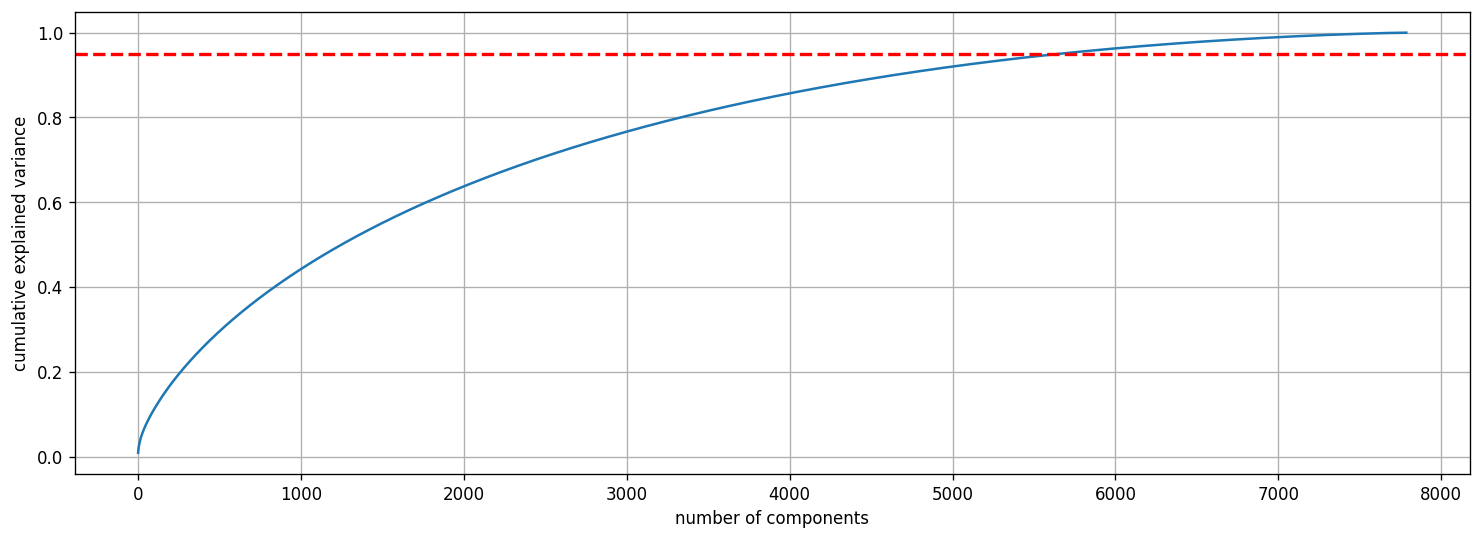

In [ ]:
# Add a grid to the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5), dpi=120)
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--',linewidth=2, label='95% Explained Variance')
plt.grid()
plt.show()

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

PCA can extract the most relevant features from a dataset. It transforms the original features into a new set of uncorrelated variables called principal components. These components are linear combinations of the original features and capture the maximum amount of variation present in the data.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Import the necessary libraries
from sklearn.decomposition import PCA
# Create an instance of PCA with the desired explained variance ratio
pca_tuned = PCA(n_components=0.95)
# Fit the PCA model on the input data, X, which is converted to a dense array
pca_tuned.fit(X.toarray())
# Transform the input data, X, to its reduced dimensional representation
X_transformed = pca_tuned.transform(X.toarray())
# Print the shape of the transformed data to see the number of samples and transformed features
print(X_transformed.shape)


(7787, 5653)


In [ ]:
X_transformed

array([[ 0.11980329, -0.02267127, -0.0122462 , ..., -0.00730293,
        -0.00697236, -0.00237195],
       [-0.04132775, -0.03107014,  0.02087998, ...,  0.00188454,
         0.01496376, -0.00731461],
       [-0.04110578, -0.04962319, -0.00337514, ..., -0.00691715,
         0.0026895 ,  0.00938257],
       ...,
       [-0.06622165,  0.11541688,  0.17191054, ..., -0.00495482,
         0.01456018, -0.0025139 ],
       [ 0.09595272,  0.00747056, -0.0022959 , ...,  0.00854873,
         0.00294345, -0.005817  ],
       [-0.07624317,  0.27774587,  0.18705256, ..., -0.00898035,
        -0.00039413,  0.00085025]])

Answer Here.

## ***7. ML Model Implementation***

##Silhouette Score Elbow for K-Means Clustering

In k-means clustering, the elbow method and contour analysis or scoring techniques are used to find the number of clusters in the data. The elbow method is used to find the "elbow" point where adding more information will not have much impact on group membership.

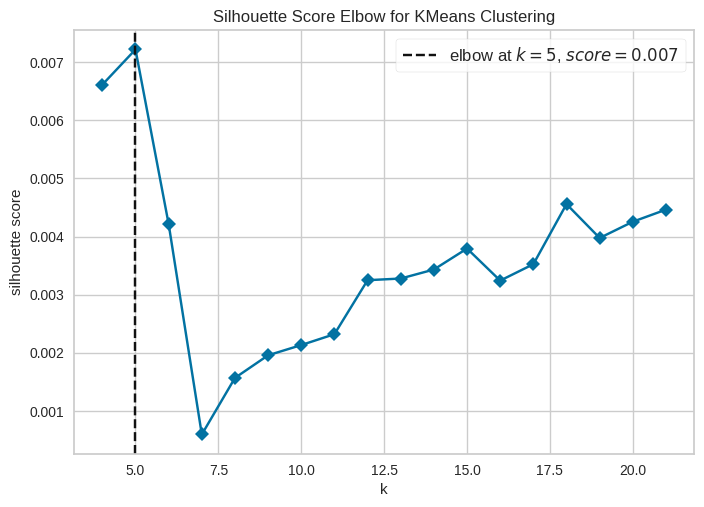

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans model with a random_state of 5
model = KMeans(random_state=5)

# Initialize the KElbowVisualizer with the KMeans model and desired parameters
visualizer = KElbowVisualizer(model, k=(4, 22), metric='silhouette', timings=False, locate_elbow=True)

# Fit the visualizer on the transformed data
visualizer.fit(X_transformed)

# Display the elbow plot
visualizer.show()

The plot will also indicate the "elbow" point, which represents the recommended number of clusters based on the selected metric.Using elbow plot with the optimal number of 5 clusters

##Silhouette Visualizer

The silhouette coefficient is calculated using the average intra-cluster distance (a) and average nearest cluster distance (b) for each sample. The silhouette coefficient of the model is (b - a) / max (a, b). Strictly speaking, b is the distance between the model and the nearest cluster to which the model does not belong.

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.0046214712918749255


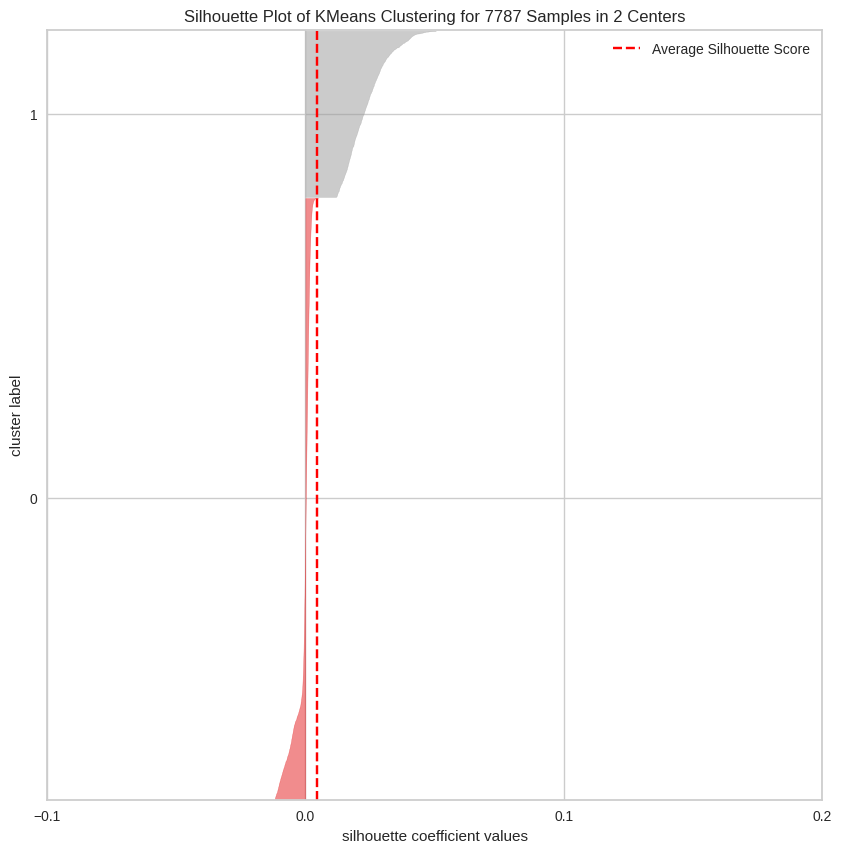

For n_clusters = 3, silhouette score is 0.005646625701933911


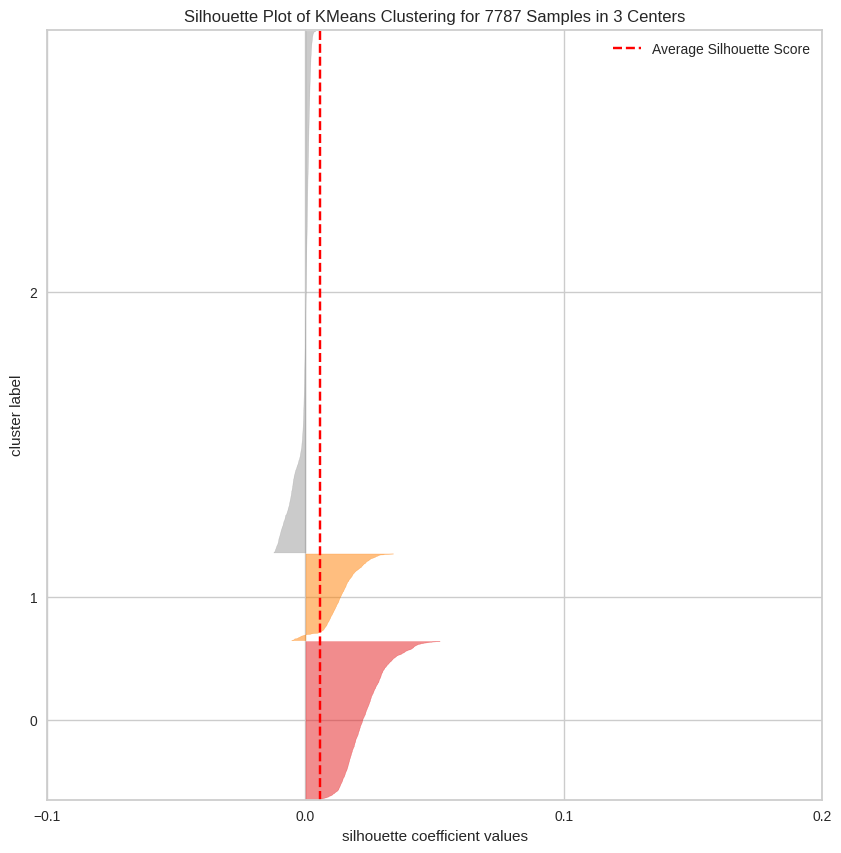

For n_clusters = 4, silhouette score is 0.006613359016102113


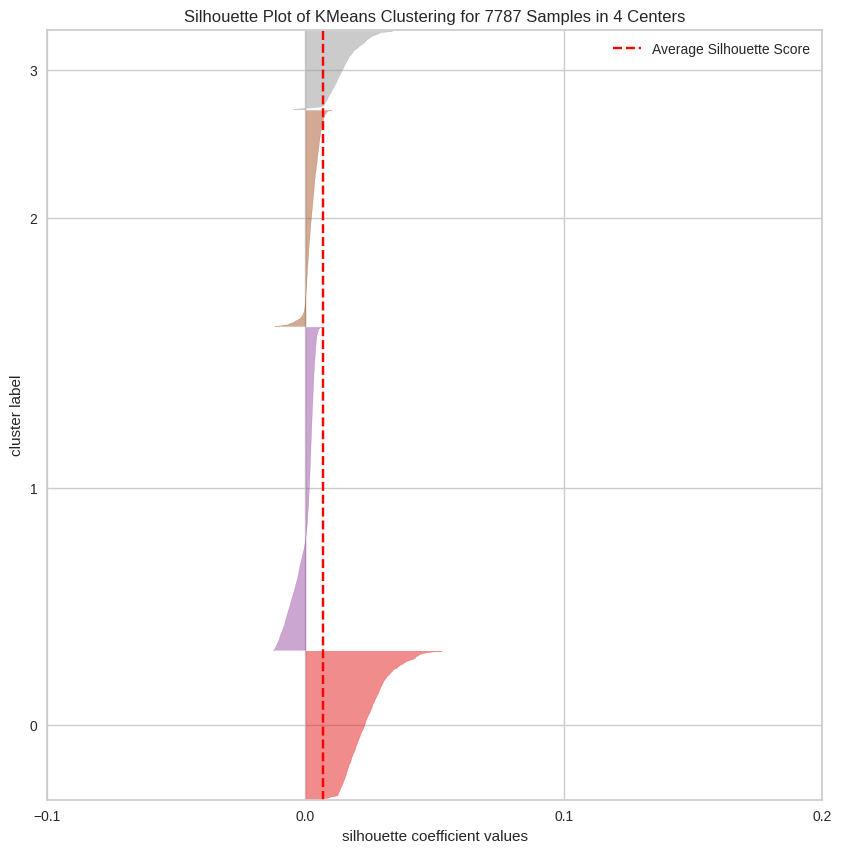

For n_clusters = 5, silhouette score is 0.007219063531029045


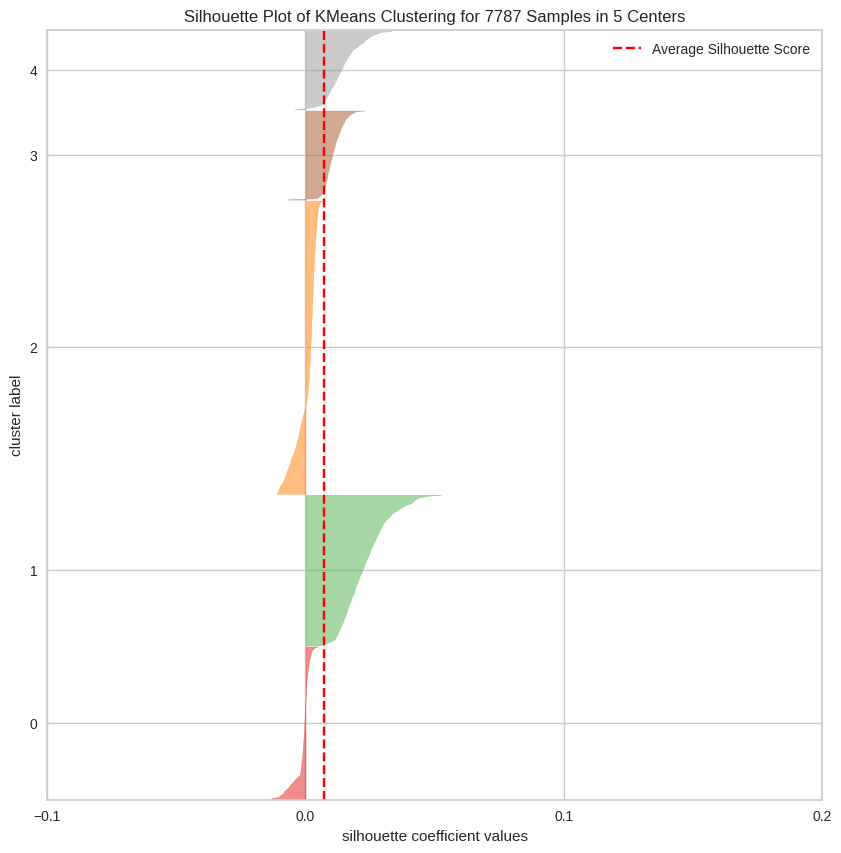

For n_clusters = 6, silhouette score is 0.00421562696026432


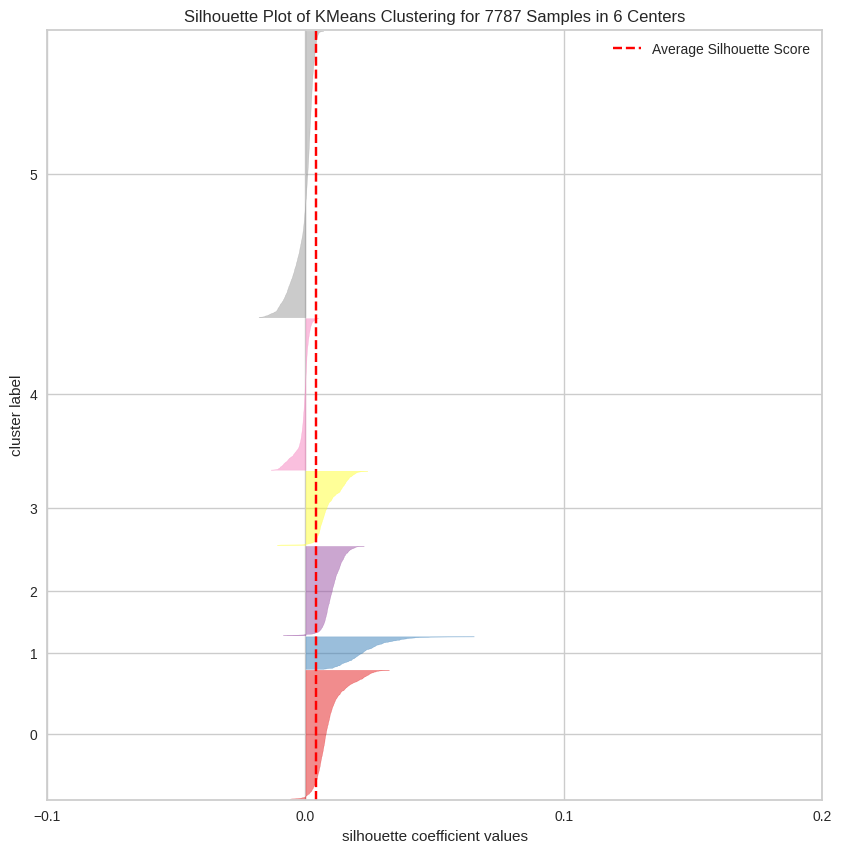

For n_clusters = 7, silhouette score is 0.000595180246123799


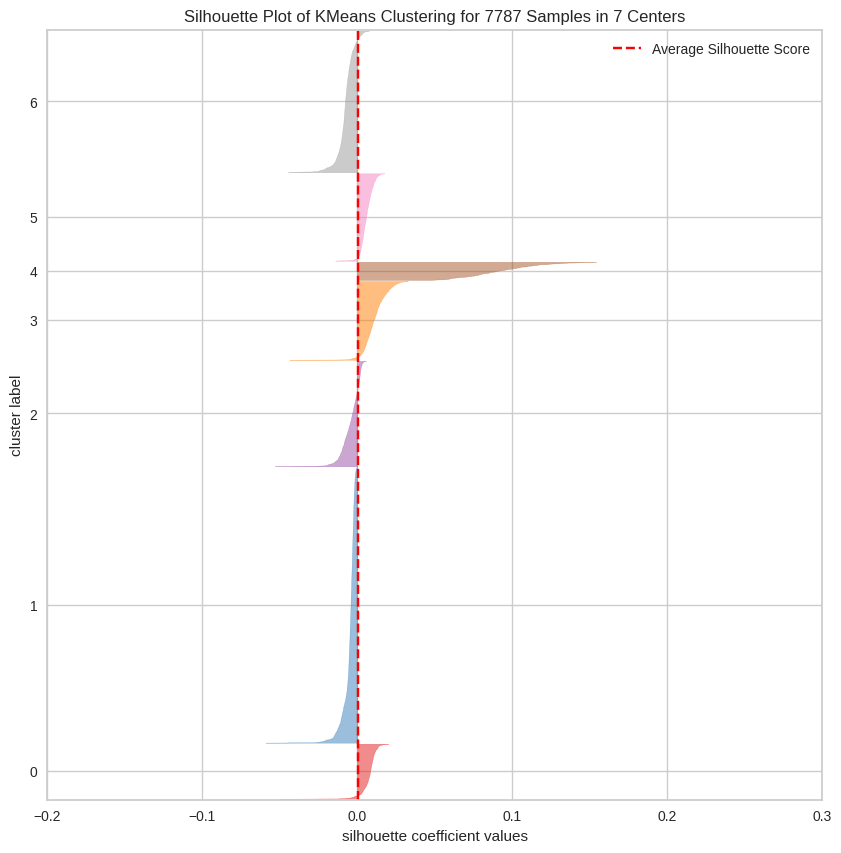

For n_clusters = 8, silhouette score is 0.0015683131187979329


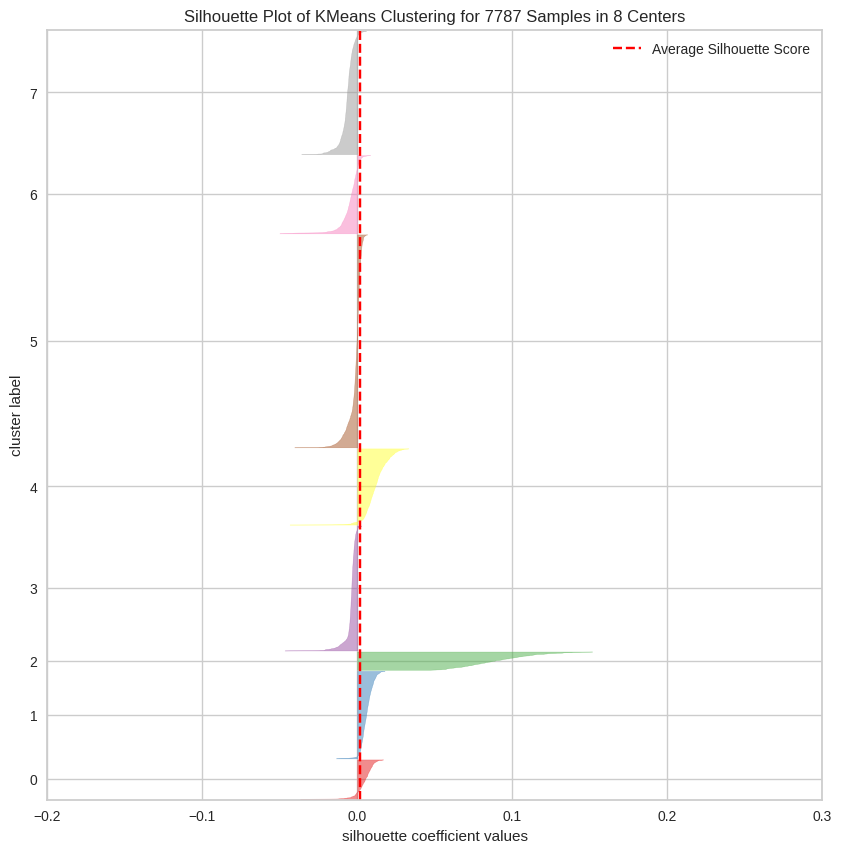

For n_clusters = 9, silhouette score is 0.001957680953506936


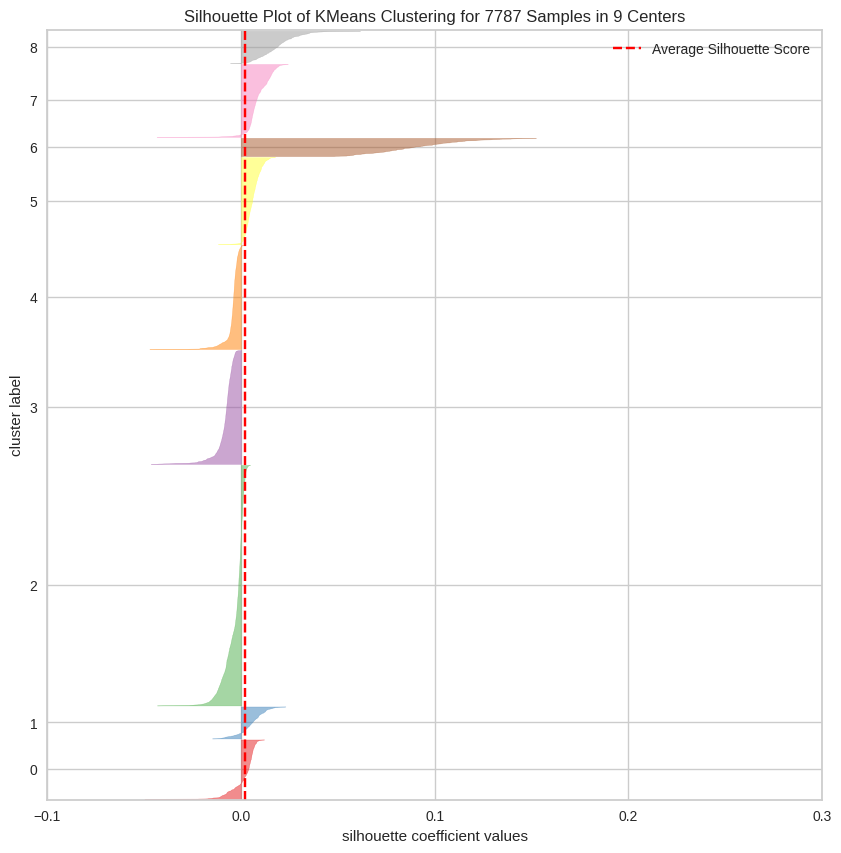

For n_clusters = 10, silhouette score is 0.0021335640033609757


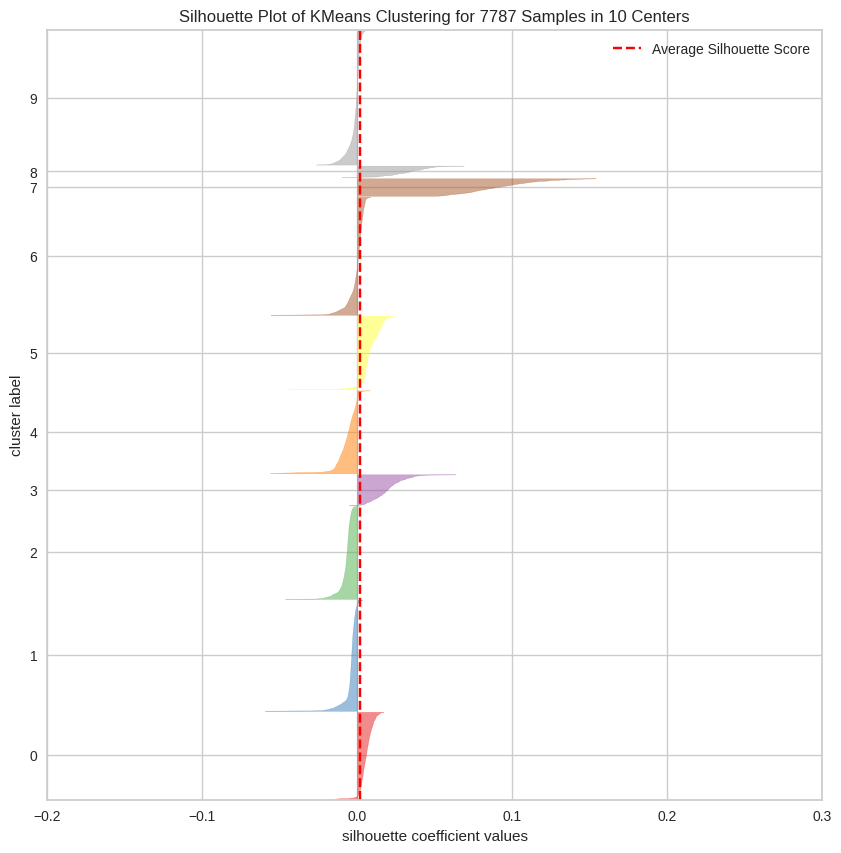

For n_clusters = 11, silhouette score is 0.0023206242937315815


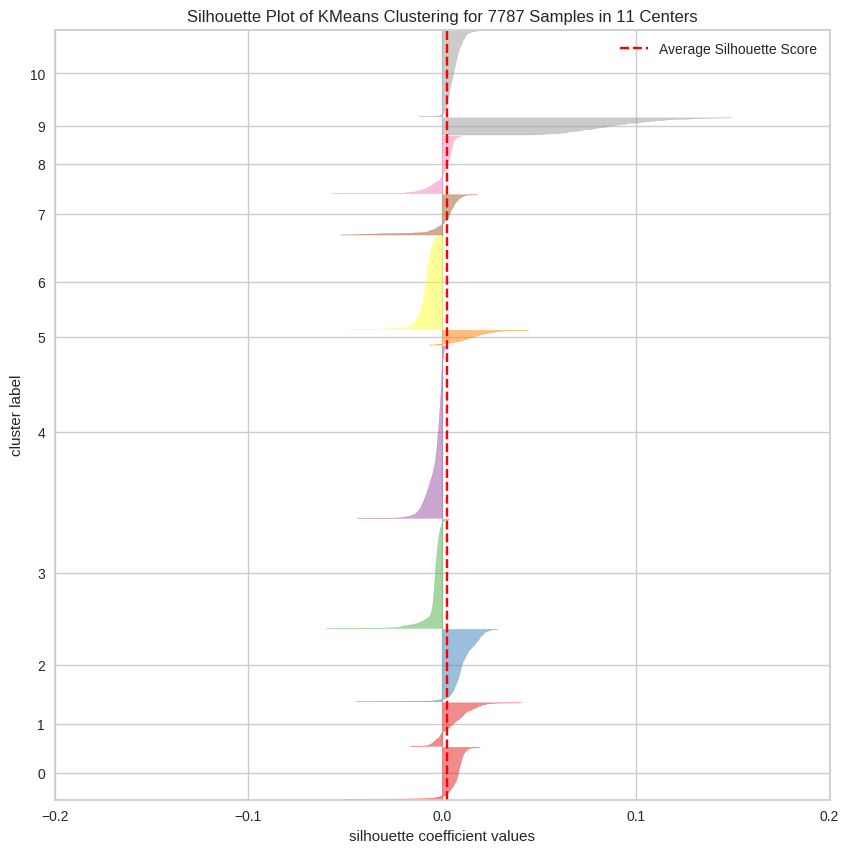

For n_clusters = 12, silhouette score is 0.0032494740752006274


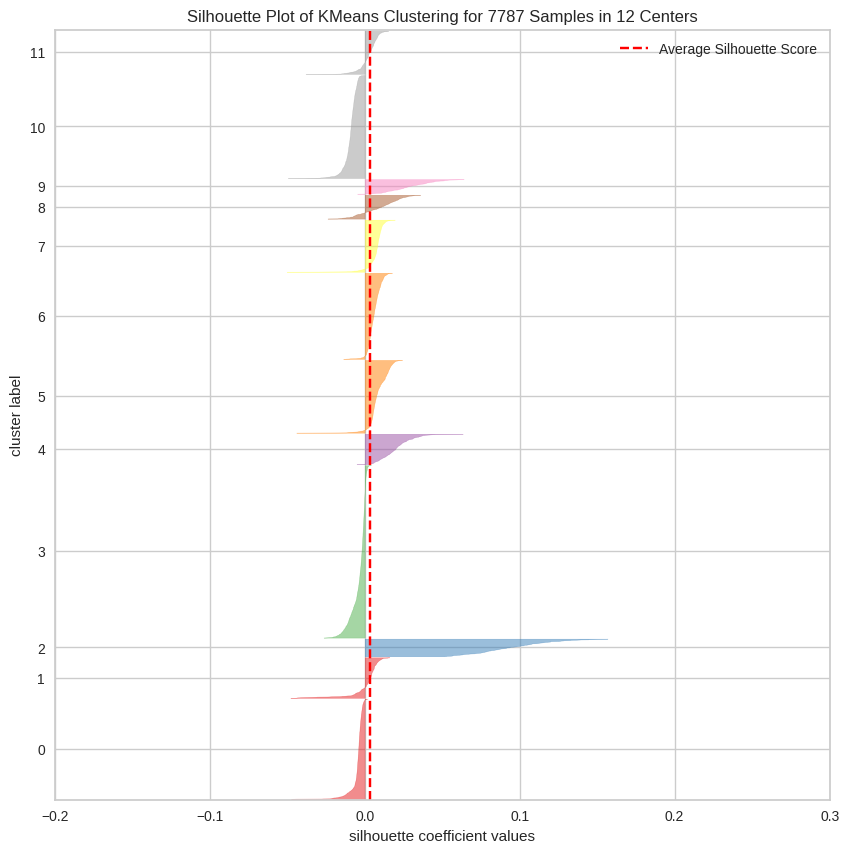

For n_clusters = 13, silhouette score is 0.003278222968532935


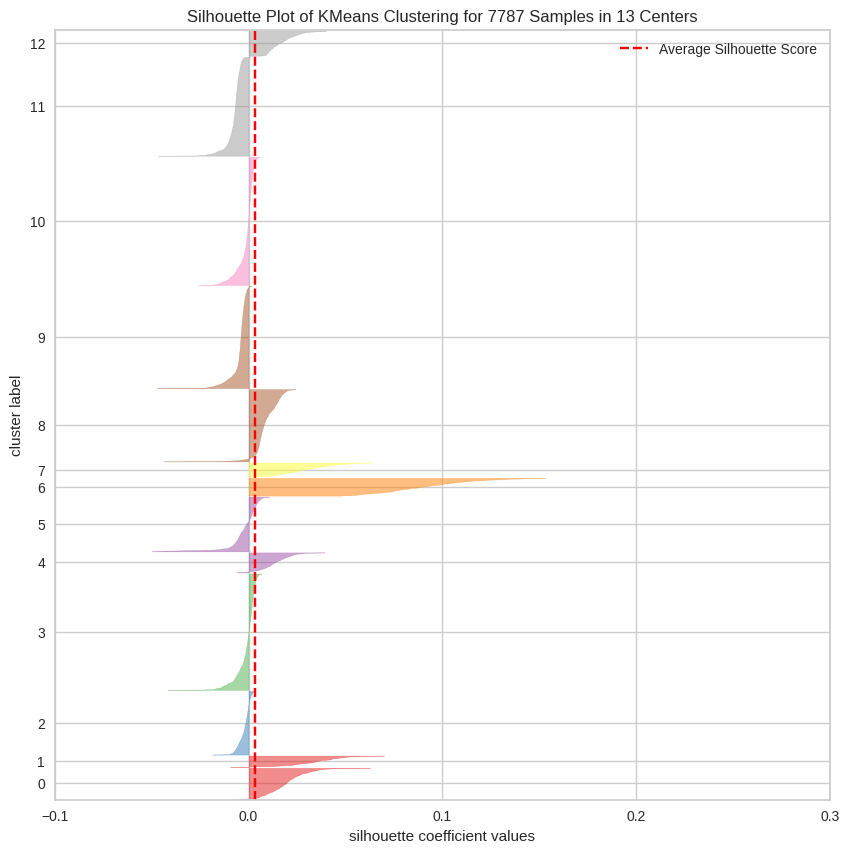

In [ ]:
silhouette_score_analysis(14)

##K Means Clustering Using the Elbow Method(ML-2)

WCSS is the sum of the squares of the distances between each point in the cluster and the mean. When we plot the WCSS with K values, the graph looks like an elbow. As the number of groups increases, the WCSS value will begin to decrease. When K = 1, the WCSS value is maximum.

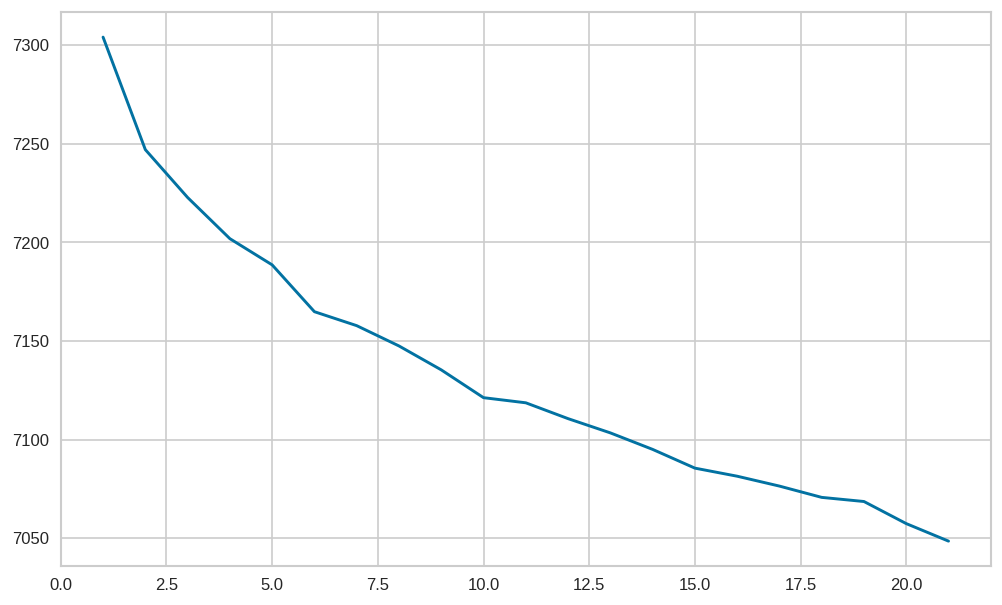

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a figure with a specific size and resolution
plt.figure(figsize=(10, 6), dpi=120)

# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Iterate over different numbers of clusters
for i in range(1, 22):
    # Create a KMeans model with default parameters
    model = KMeans(random_state=0)

    # Initialize the KMeans algorithm with specific parameters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

    # Fit the KMeans algorithm to the transformed data
    kmeans.fit(X_transformed)

    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plot the number of clusters against the WCSS
plt.plot(range(1, 22), wcss)



Alternatively, we run the k-means clustering (k-means number of clusters) method on the dataset for a range of k values ​​(e.g. 1 to 10), plan the distance and try to reduce currency elbow point of the exchange rate. Calculate the total sum of squares (WSS) for each k.03

##Agglomerative clustering(ML-3)

Agglomerative clustering is a hierarchical clustering algorithm. It is an unsupervised machine learning method that divides the population into groups so that data points in the same group are similar and data points in different groups are dissimilar.

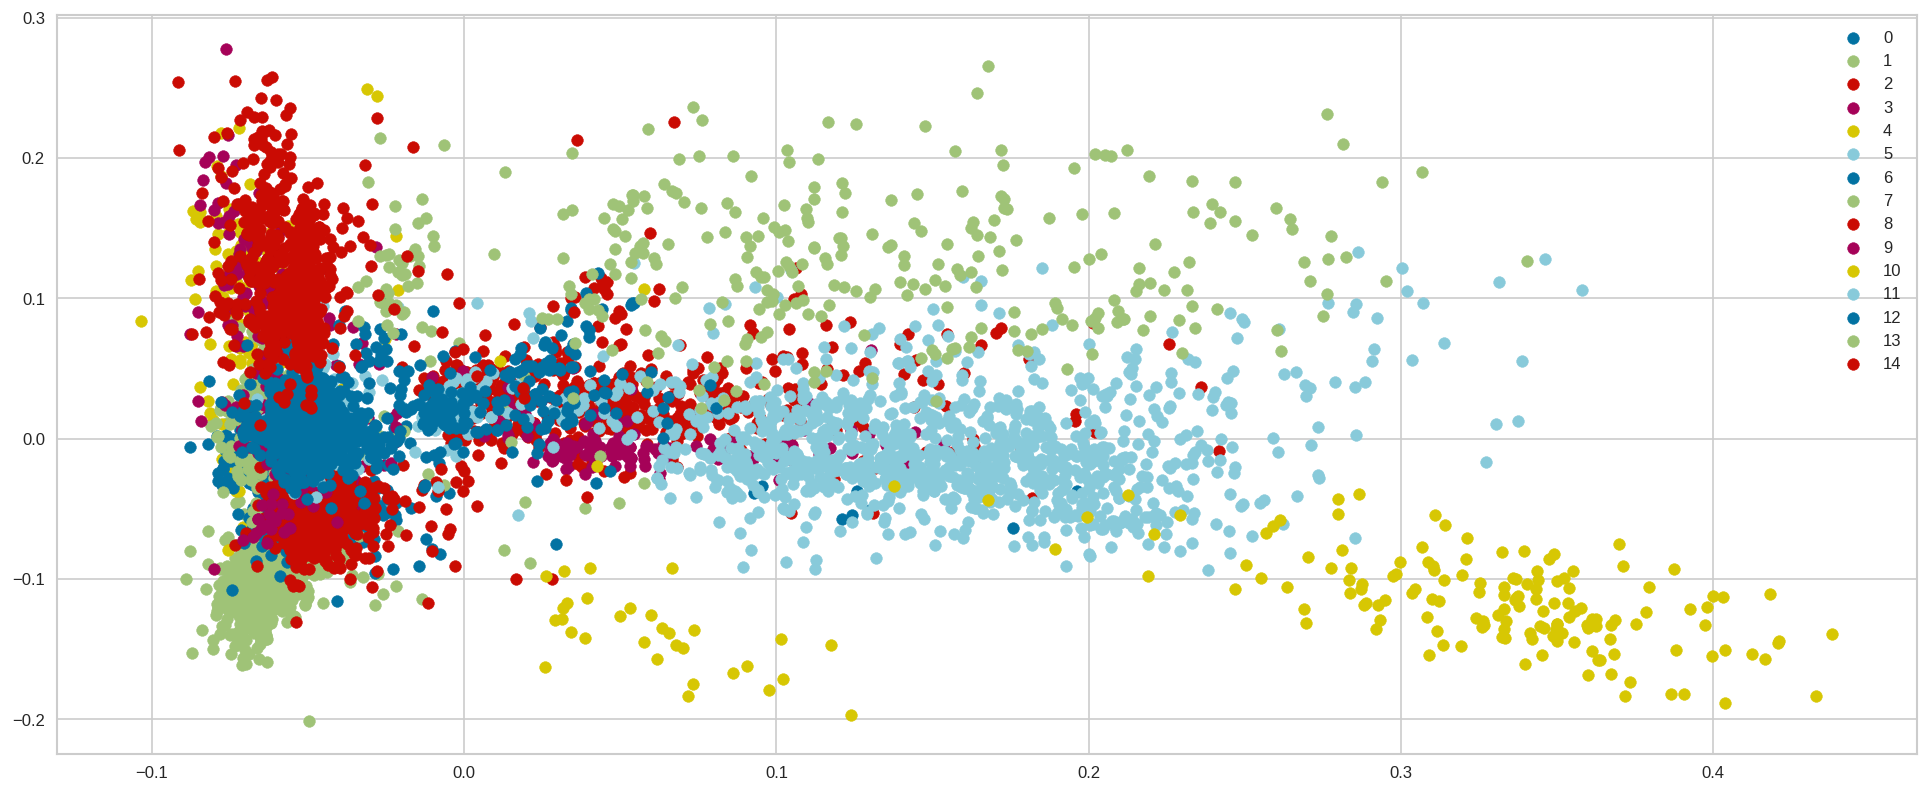

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Create a figure with a larger size and resolution
plt.figure(figsize=(20, 8), dpi=120)

# Initialize a KMeans model with 15 clusters
kmeans = KMeans(n_clusters=15, init='k-means++', random_state=9)

# Fit the KMeans algorithm to the transformed data
kmeans.fit(X_transformed)

# Predict the labels of the clusters
label = kmeans.fit_predict(X_transformed)

# Get unique labels from the predictions
unique_labels = np.unique(label)

# Plot the results
for i in unique_labels:
    # Scatter plot the points belonging to each cluster
    plt.scatter(X_transformed[label == i, 0], X_transformed[label == i, 1], label=i)

# Display a legend to identify the clusters
plt.legend()

# Show the plot
plt.show()


Aggregative clustering uses a bottom-up approach where each data point starts from its own cluster. These groups are then associated with greed by combining two similar groups together. Split clustering uses a top-down approach where all data points start from the same cluster.

##Add cluster values to the dateframe.

In [ ]:
netflix_movies1['cluster_number'] = kmeans.labels_
netflix_movies1.head(1)

show_id     type title director  \
0      s1  TV Show    3%            

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   

   month_added target_ages  count  \
0          8.0      Adults      1   

                                          clustering  \
0   João Miguel, Bianca Comparato, Michel Gomes, ...   

                                          Clean_Text  cluster_number  
0  joão miguel bianca comparato michel gomes rodo...               5

## Count the number of movies or TV shows in each cluster

In [ ]:
# Count the number of movies or TV shows in each cluster
cluster_content_count = netflix_movies1['cluster_number'].value_counts().reset_index().rename(columns={'index': 'clusters', 'clusters': 'Movies/TV_Shows'})

# Print the cluster content count
print(cluster_content_count)

    clusters  cluster_number
0         12            1299
1          5            1013
2          8            1006
3          1             860
4         14             542
5          2             510
6          7             496
7          6             457
8         11             410
9         13             315
10         9             232
11         3             196
12        10             181
13         4             151
14         0             119


##GENRE WORDCLOUD

A word cloud or tag cloud is a graphical representation of word frequency that shows words that occur frequently in text. The bigger the word in the eye, the more words there are on the paper.

Exploring Cluster 9
Looking for insights from type Movies/TV Shows


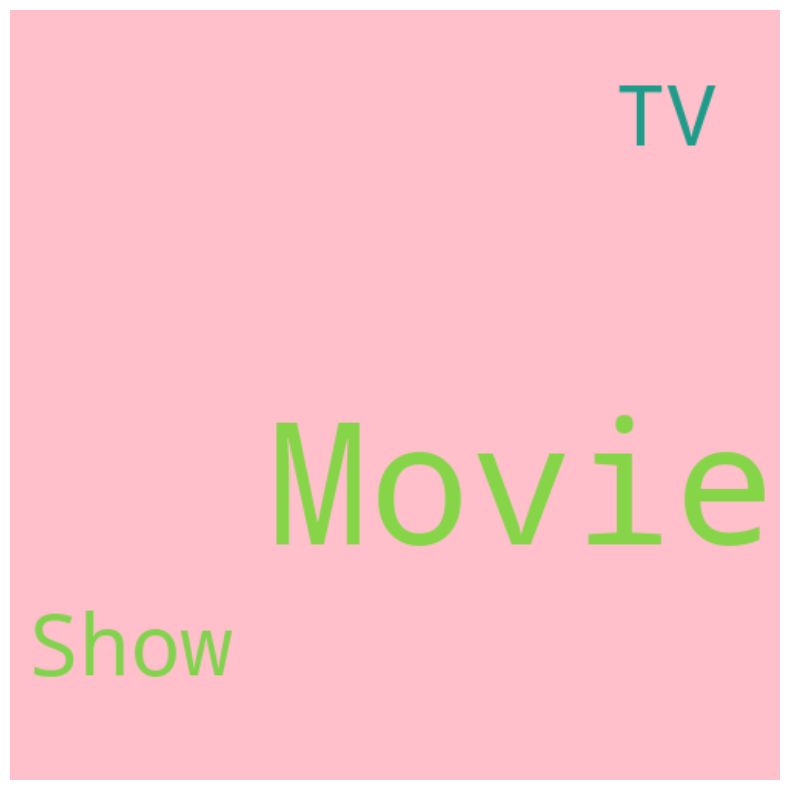

Looking for insights from title Movies/TV Shows


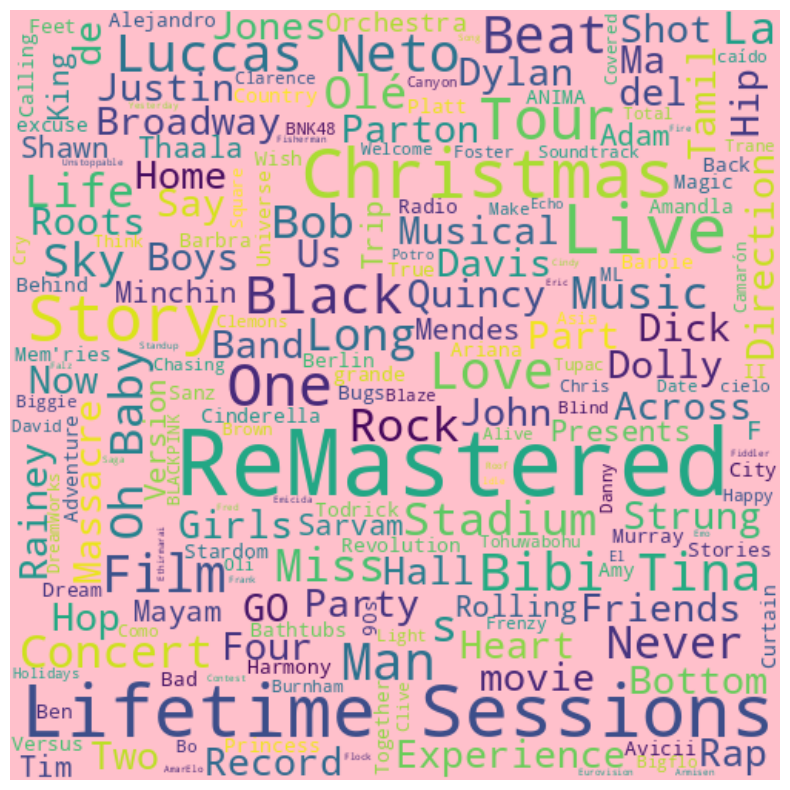

Looking for insights from country Movies/TV Shows


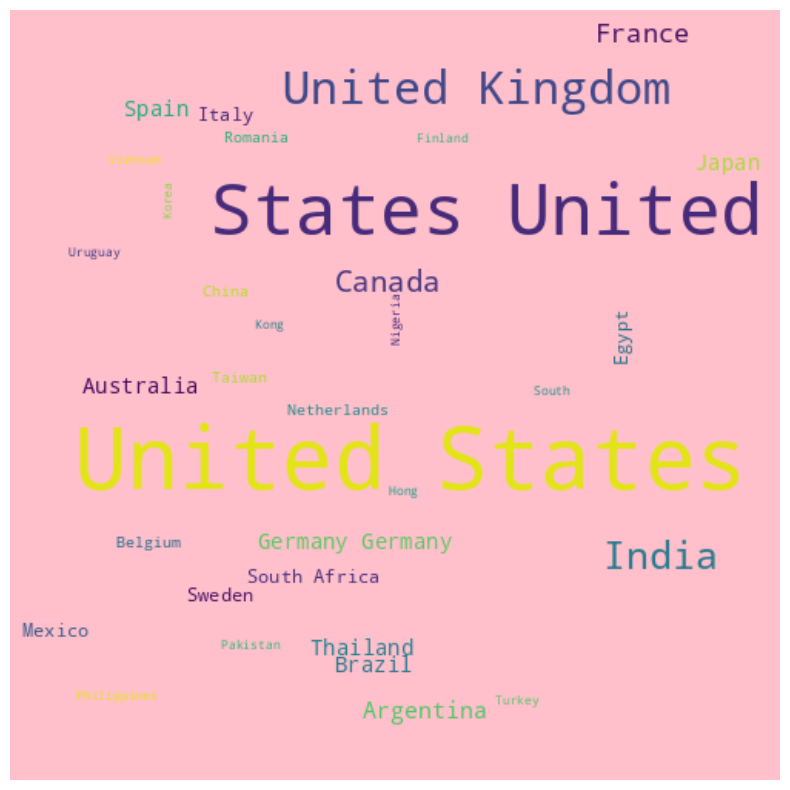

Looking for insights from rating Movies/TV Shows


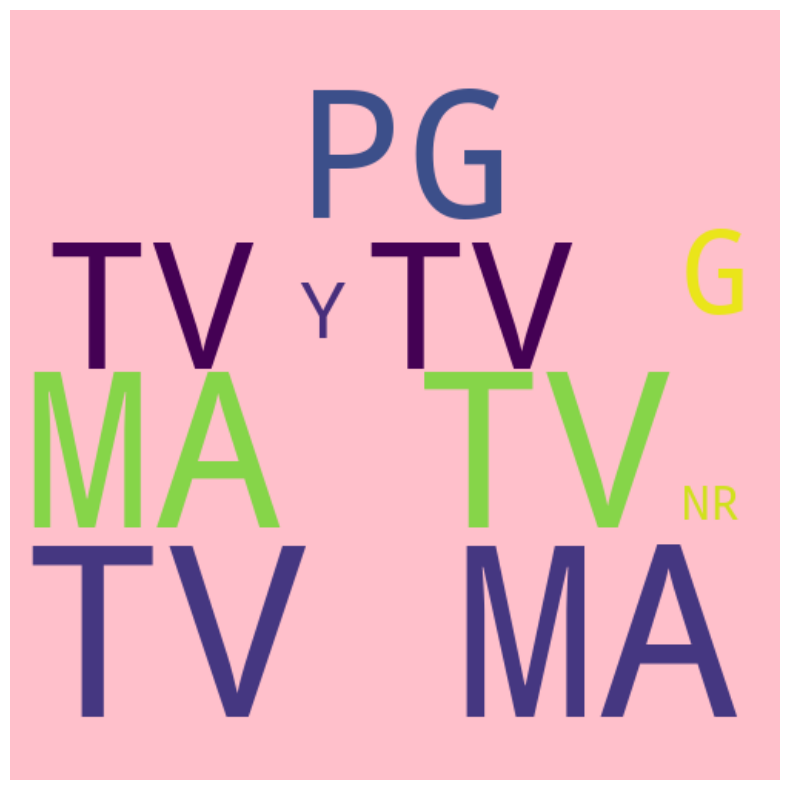

Looking for insights from listed_in Movies/TV Shows


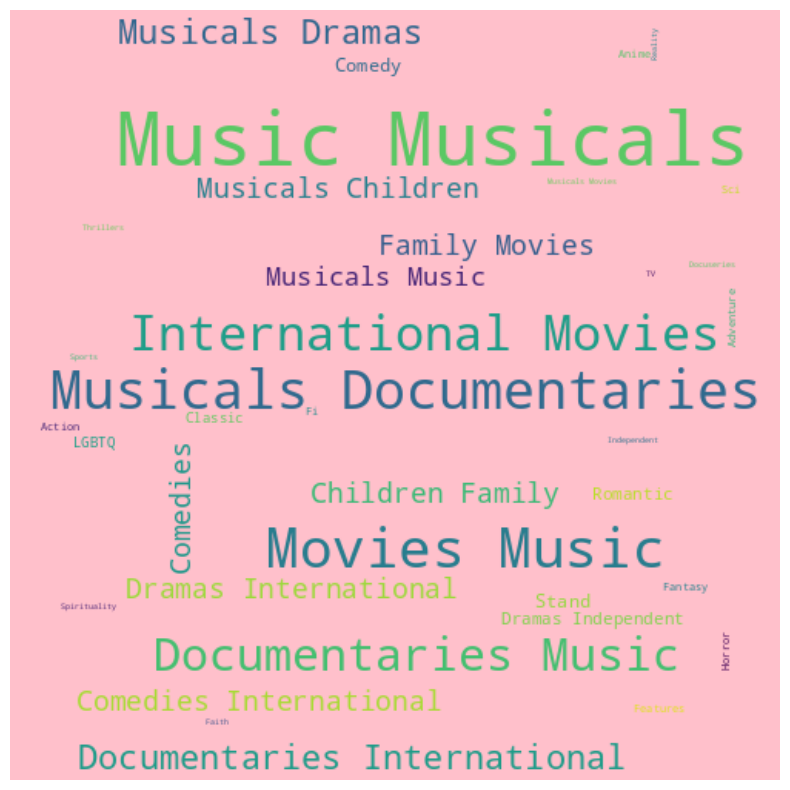

Looking for insights from description Movies/TV Shows


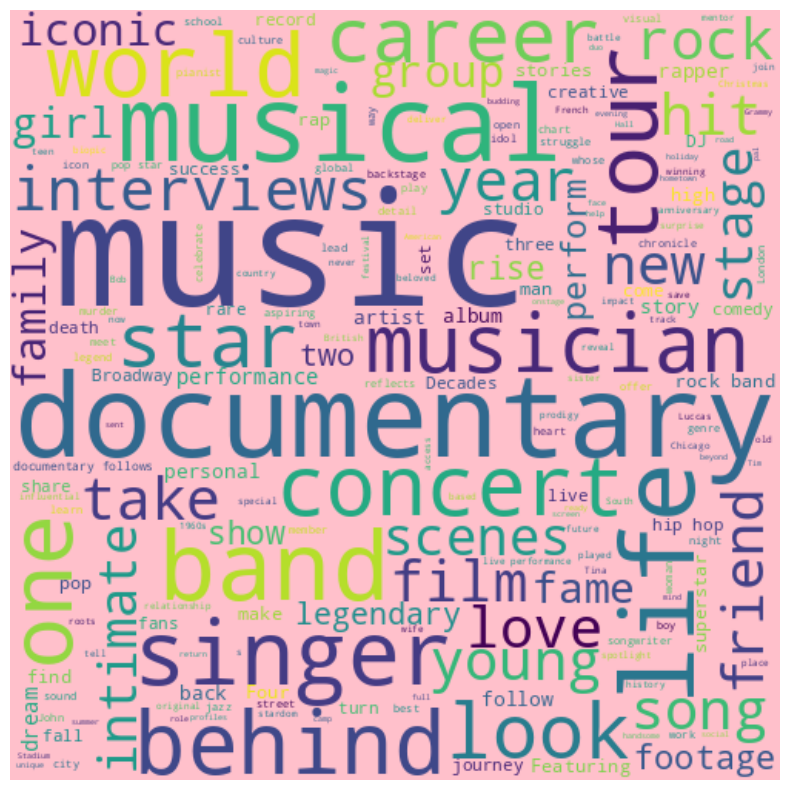

In [ ]:
# Visualizing evaluation Metric Score chart
#word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def word_count(category):
  print("Exploring Cluster", category)
  col_names = ['type','title','country','rating','listed_in','description']
  for i in col_names:
    df_word_cloud = netflix_movies1[['cluster_number',i]].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category]
    text = " ".join(word for word in df_word_cloud[i])
    # Create stopword list:
    stopwords = set(STOPWORDS)
  # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="#FFC0CB",width=500,height=500).generate(text)
  # Display the generated image:
  # the matplotlib way:
    plt.rcParams["figure.figsize"] = (10,10)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    print("Looking for insights from", i ,"Movies/TV Shows")

    plt.show()

word_count(9)

Cluster 9 in a dataset contains a total of 232 words. The most frequently occurring words in this cluster are as follows:

Type - Movie & Tv shows

Title - Broadway,Remastered,Christmas ,Friends Orchestra

Country- United Kingdom,Argentina,United States,India

Rating -TV-MA,PG-TV

Listed_in - Dramas International,Musical Dramas,Musicial Documentaries,Comedies International

Description- Documentary ,Music,One,Bad,Tour ,Love.

Exploring Cluster 11
Looking for insights from type Movies/TV Shows


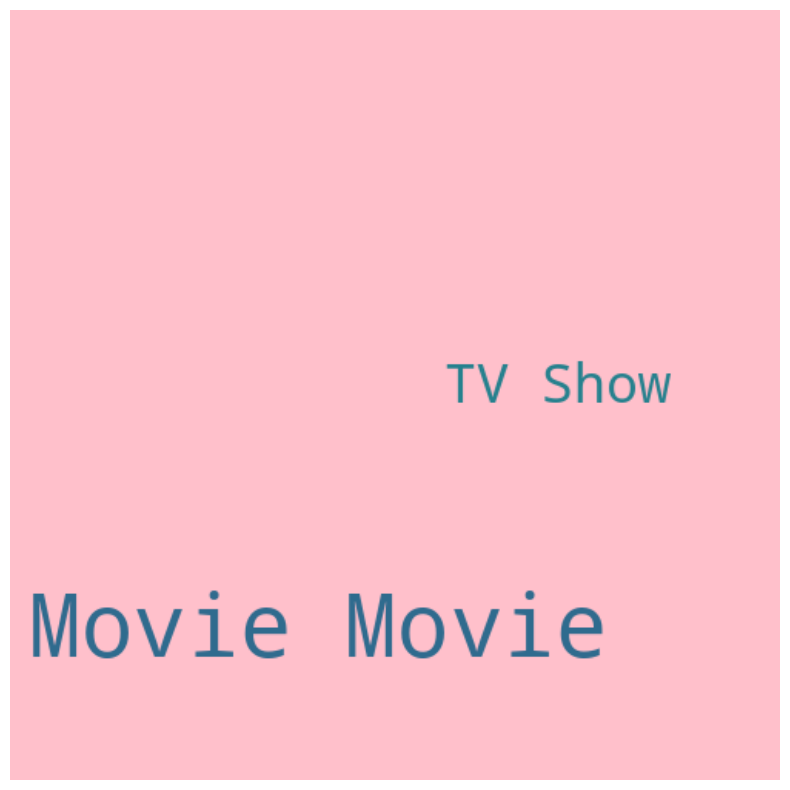

Looking for insights from title Movies/TV Shows


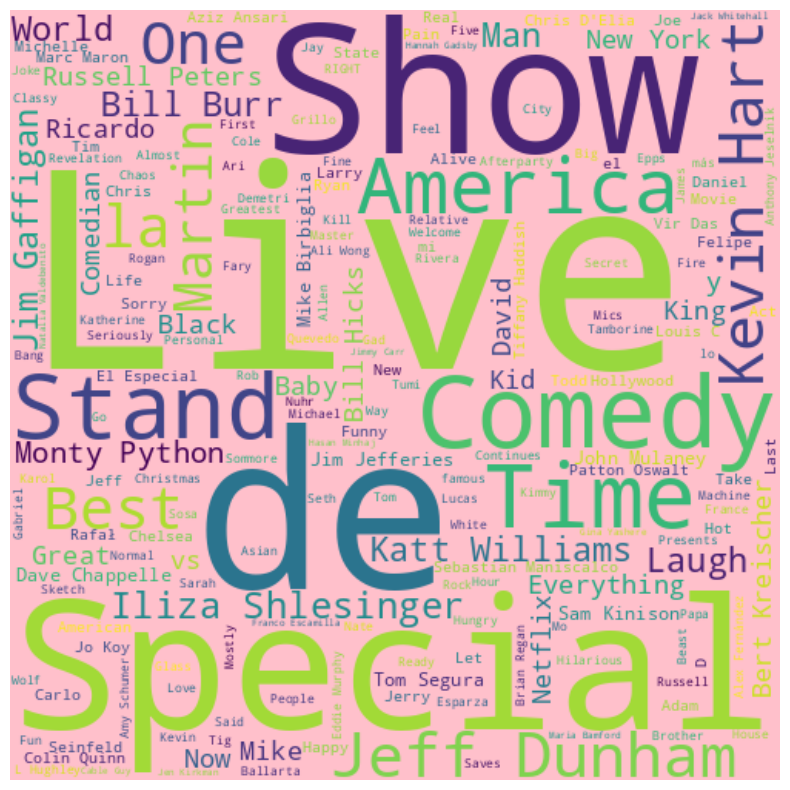

Looking for insights from country Movies/TV Shows


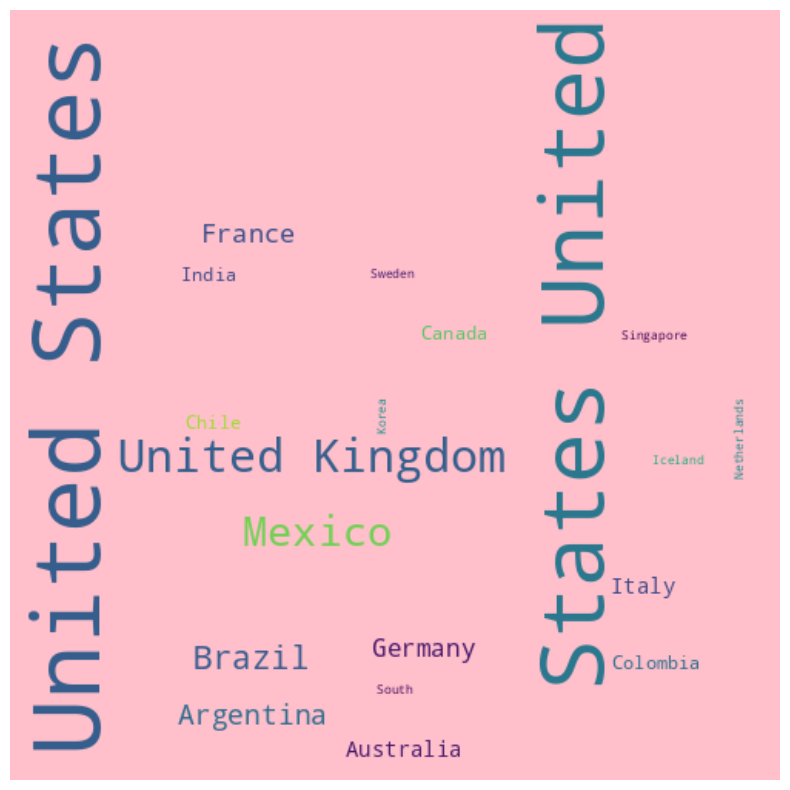

Looking for insights from rating Movies/TV Shows


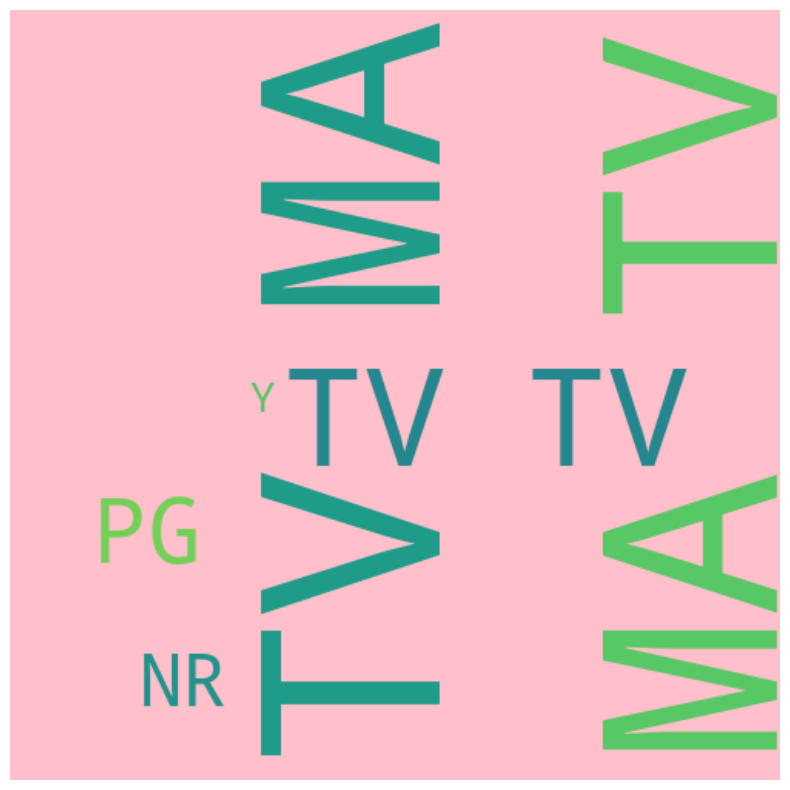

Looking for insights from listed_in Movies/TV Shows


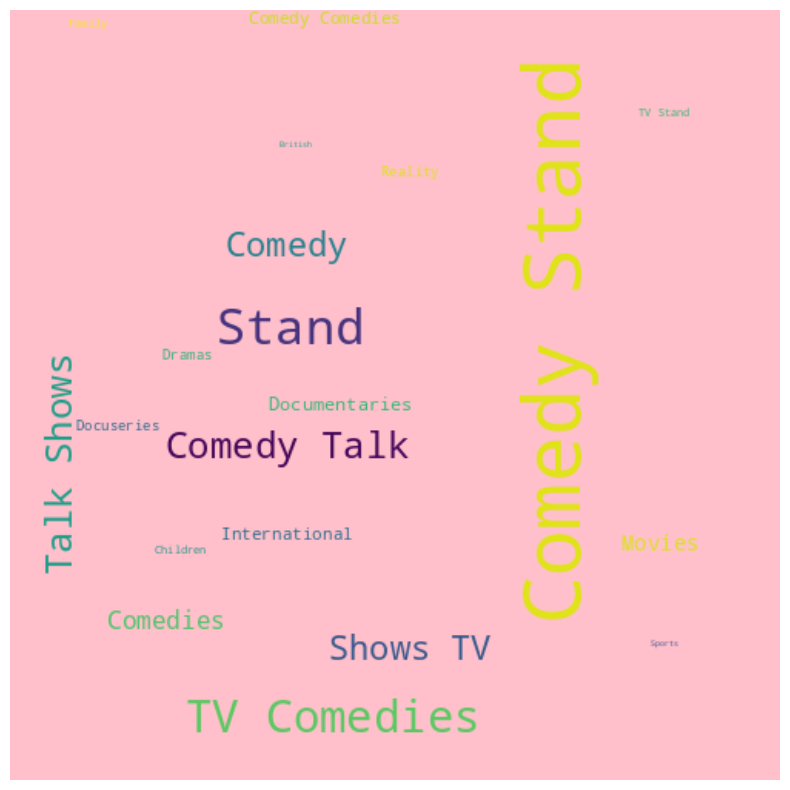

Looking for insights from description Movies/TV Shows


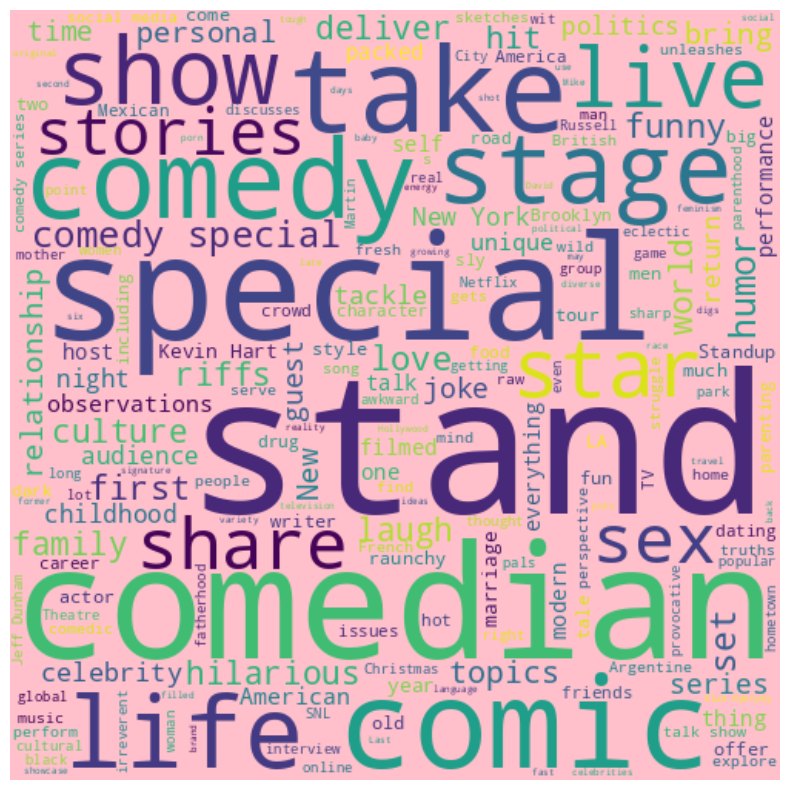

In [ ]:
word_count(11)

A word cloud (also called a tag cloud or word cloud) is an image of words in which a word appears larger as it is spoken. Word clouds are great for visualizing unstructured data and gaining insights into trends and patterns.

Cluster 11 in a dataset contains a total of 410 words. The most frequently occurring words in this cluster are as follows:

Type - Movie & Tv shows

Title - Special, America,Time,Live,Comedy, Netflix Alive, Martin

Country - United States,Brazil,Mexico,Italy

Rating -TV-MA,TV-PG

Listed_in - Tv-Comedies, Comedy Stand, Talk shows

Description- Stand Comedy, Comic, Take, Life, Live, Share,Stories.

## ***8.*** ***Recommender system***

Recommendations are data filters that recommend products to users based on their interests, preferences, or past behavior. E-commerce websites, publishing platforms, social media, etc. It is widely used in many applications. The purpose of recommendation is to provide users with personalized recommendations that are relevant and useful.

Content-based filtering: This method recommends products similar to those the user has liked or interacted with in the past. Analyzes the ingredients or features of products and finds similar products to recommend. For example, if the user likes to watch movies, the system can recommend other movies based on genre, actors or story.

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_movies1['description'] = netflix_movies1['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_movies1['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7787, 17905)

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.05827946, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.09600035, 0.        ,
        0.        ],
       [0.05827946, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.09600035, 0.        , ..., 1.        , 0.        ,
        0.02819239],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02819239, 0.        ,
        1.        ]])

In [ ]:
indices = pd.Series(netflix_movies1.index, index=netflix_movies1['title']).drop_duplicates()

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_movies1['title'].iloc[movie_indices]

netflix_movies1['title'][1:70]

1                                                  7:19
2                                                 23:59
3                                                     9
4                                                    21
5                                                    46
                            ...                        
65                                              13 Sins
66                                                 13TH
67    13TH: A Conversation with Oprah Winfrey & Ava ...
68                                            14 Blades
69                                           14 Cameras
Name: title, Length: 69, dtype: object

In [ ]:
get_recommendations( '14 Cameras',cosine_sim)

5064                           Ragini MMS
5425                  Scandal in Sorrento
2383                               Get In
541                                  Anon
7568                       What We Wanted
2087    Fabulous Lives of Bollywood Wives
7095                           Time Share
6975                         The Vanished
1092                             Breakout
5465                Secreto bien guardado
Name: title, dtype: object

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we study the text problem where we have to divide/group Netflix shows into some groups, such as shows in the same group and shows in different groups are different.
The file contains approximately 7787 records and 11 attributes.
First, we handle missing values ​​in the data set and perform data analysis (EDA).
All new movies on Netflix have increased exponentially with the discovery that there are more movies than TV series on Netflix's platform. Additionally, most of the series are produced in the United States, and most of the series on Netflix are designed for adults and teens.
It was decided to group the files according to the following characteristics: Director, Actor, Country, Genre and Description. Values ​​in these attributes are tokenized, preprocessed, and then vectorized using the TFIDF vectorizer.
Thanks to TFIDF vectorization, we create a total of 20,000 characters.
We use principal component analysis (PCA) to solve the curse of dimensionality. 4000 components capture more than 80% of the variance, so the number of components is limited to 4000.
We first used k-means clustering algorithm to create clusters and the best of the group is 6. This is obtained from the elbow and Silhouette score.
Then use Agglomerative clustering algorithm to create cluster and quality of cluster is 12. This was achieved after seeing dendrography.
A content-based agreement is created using the similarity matrix obtained after cosine similarity. This recommendation will give users 10 recommendations based on the type of programs they watch.

##References

https://www.kaggle.com/code/bansodesandeep/netflix-movies-and-tv-shows-clustering

https://github.com/San13deep/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Capstone_4_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb

https://betterprogramming.pub/netflixs-hidden-gems-how-clustering-helps-you-find-your-new-favorite-shows-season-1-f30cf0e0a1fe


https://github.com/Sumegha22/Netflix-Movies-TV-shows-Clustering--Unsupervised-Learning-/blob/main/SUMANA%7C_Netflix_Movies_%26_TV_shows_Clustering_Unsupervised_Learning_.ipynb

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***